___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

In [113]:
pd.set_option("display.max_columns" , None)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [114]:
df_male = pd.read_csv("ansur_male.csv", encoding='latin-1')

In [115]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [116]:
df_male.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [117]:
df_female = pd.read_csv("ansur_female.csv", encoding='latin-1')

In [118]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [119]:
df_female.rename(columns={"SubjectId" : "subjectid"}, inplace = True)

In [120]:
df_female.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [121]:
same_columns = np.intersect1d(df_male.columns, df_female.columns)

print("Common Columns count:", len(same_columns))

Common Columns count: 108


In [122]:
df = pd.concat([df_male, df_female], ignore_index = True)

In [123]:
df_2 = df.copy()

## Explore Data

In [124]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
...,...,...,...,...,...,...,...,...
SubjectNumericRace,6068.0,17.515326,550.949948,1.0,1.00,1.0,2.00,42351.0
DODRace,6068.0,1.615030,0.979156,1.0,1.00,1.0,2.00,8.0
Age,6068.0,29.761206,8.674650,17.0,23.00,28.0,36.00,58.0
Heightin,6068.0,68.257251,3.861954,56.0,66.00,68.0,71.00,94.0


In [126]:
df.isnull().sum().sort_values(ascending=False)

Ethnicity                         4647
subjectid                            0
radialestylionlength                 0
thighcircumference                   0
tenthribheight                       0
                                  ... 
earprotrusion                        0
earlength                            0
earbreadth                           0
crotchlengthposterioromphalion       0
WritingPreference                    0
Length: 108, dtype: int64

In [127]:
df.isnull().sum().Ethnicity / len(df.Ethnicity)

0.765820698747528

In [128]:
df.drop(columns=['Ethnicity'], inplace=True)

In [129]:
df.isnull().sum().any()

False

In [130]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object')

In [131]:
for col in df.select_dtypes(include=['object']).columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column Gender has 2 unique values
Column Date has 253 unique values
Column Installation has 12 unique values
Column Component has 3 unique values
Column Branch has 3 unique values
Column PrimaryMOS has 285 unique values
Column SubjectsBirthLocation has 152 unique values
Column WritingPreference has 3 unique values


In [132]:
df.drop(columns=['Date', 'Installation', 'PrimaryMOS', 'SubjectsBirthLocation'], inplace=True)

In [133]:
df.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [134]:
df.drop(columns=['SubjectNumericRace'], inplace=True)

In [135]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [136]:
df["DODRace"] = df.DODRace.map({1: "White", 2: "Black", 3: "Hispanic", 4: "Asian", 5: "Native American", 6: "Pacific Islander", 8: "Other"})

In [137]:
df.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [138]:
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") |
                (df["DODRace"] == "Hispanic")]

<Figure size 640x480 with 0 Axes>

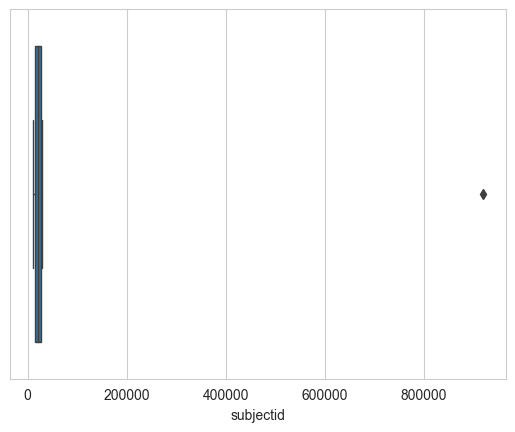

<Figure size 640x480 with 0 Axes>

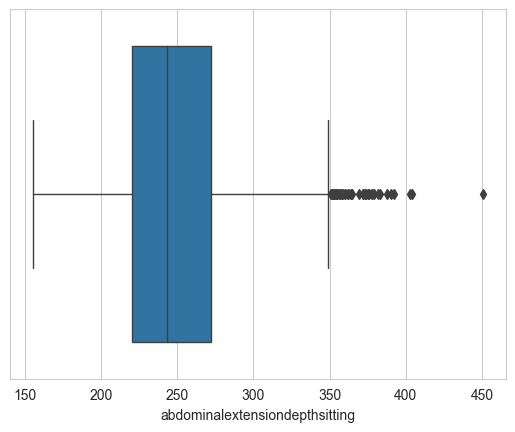

<Figure size 640x480 with 0 Axes>

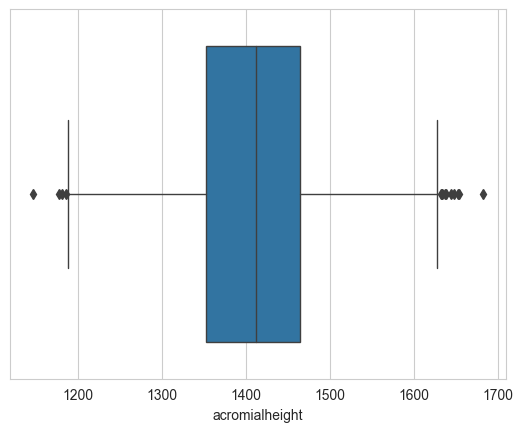

<Figure size 640x480 with 0 Axes>

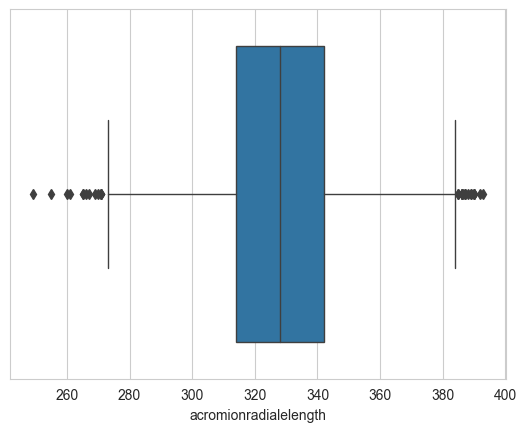

<Figure size 640x480 with 0 Axes>

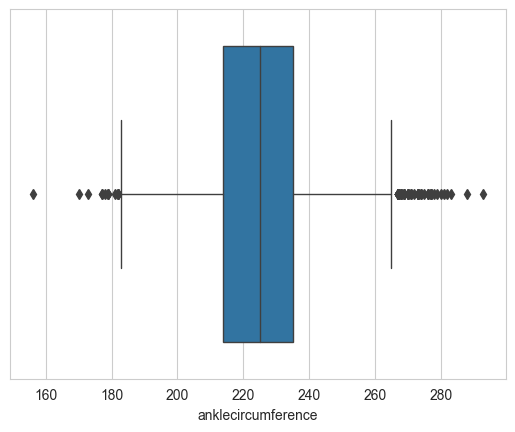

<Figure size 640x480 with 0 Axes>

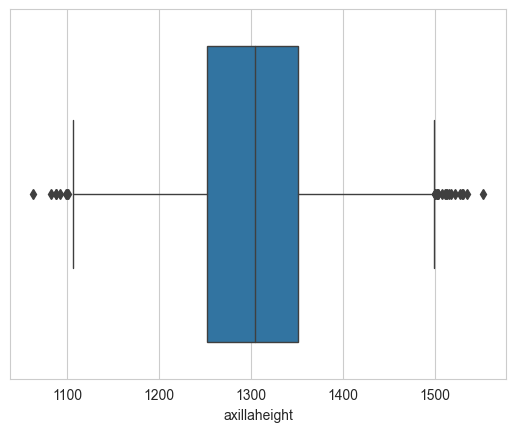

<Figure size 640x480 with 0 Axes>

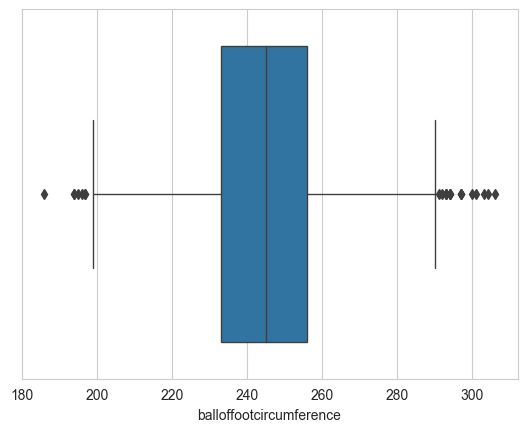

<Figure size 640x480 with 0 Axes>

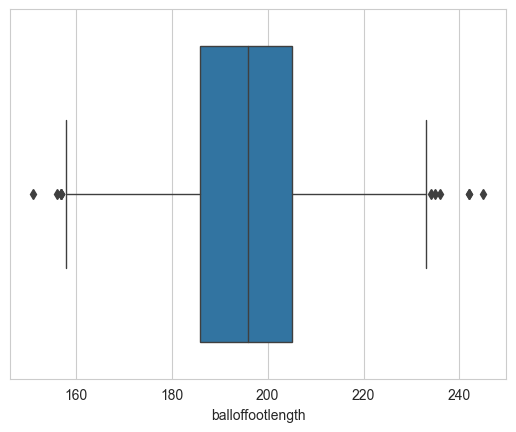

<Figure size 640x480 with 0 Axes>

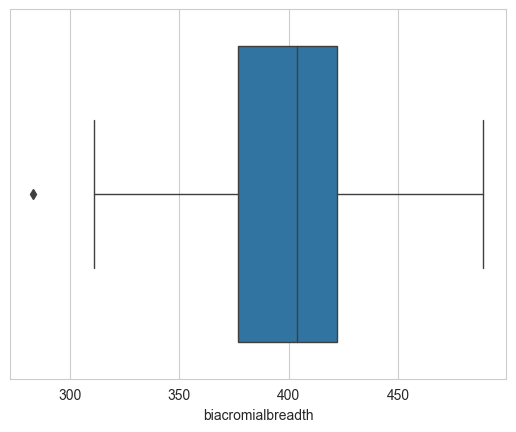

<Figure size 640x480 with 0 Axes>

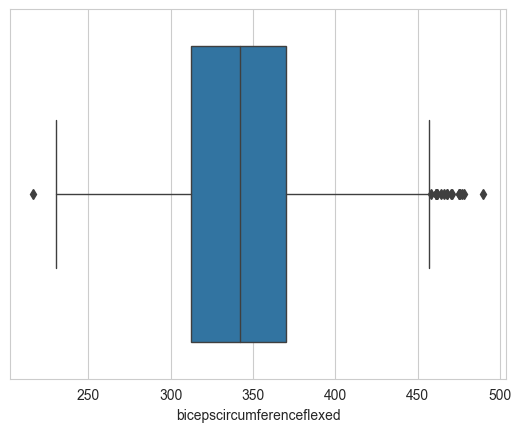

<Figure size 640x480 with 0 Axes>

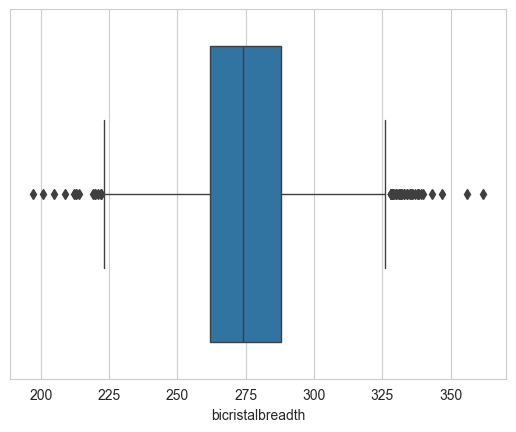

<Figure size 640x480 with 0 Axes>

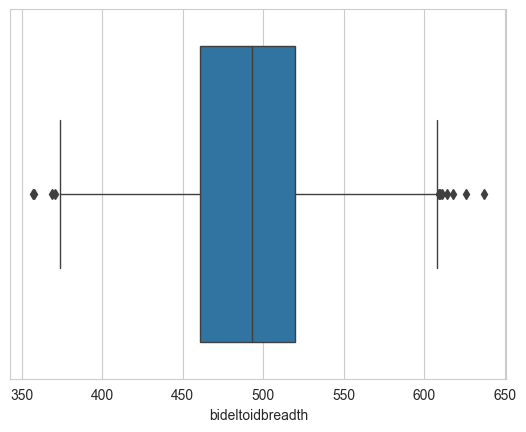

<Figure size 640x480 with 0 Axes>

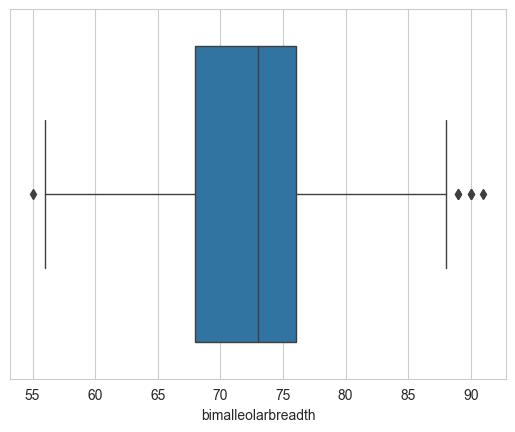

<Figure size 640x480 with 0 Axes>

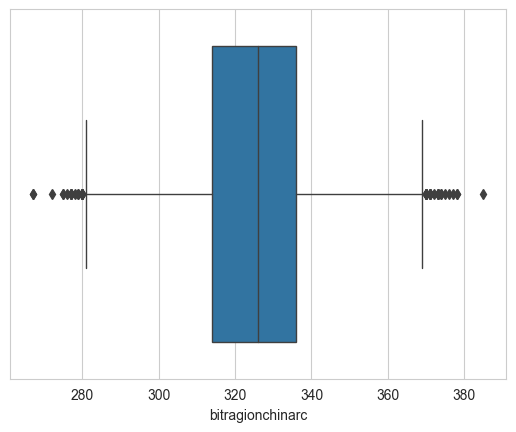

<Figure size 640x480 with 0 Axes>

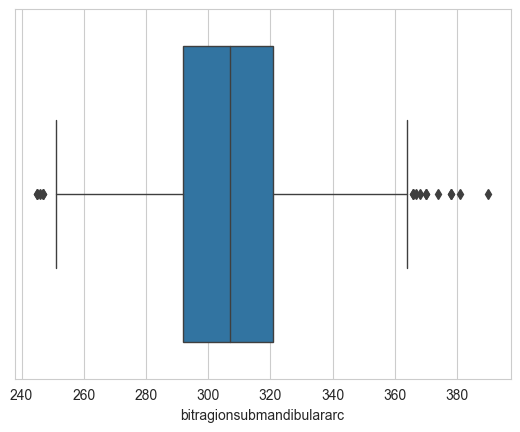

<Figure size 640x480 with 0 Axes>

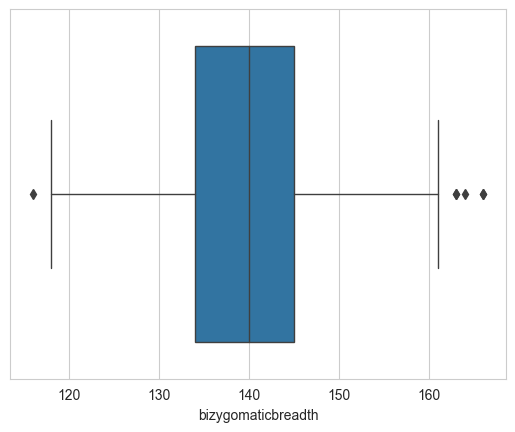

<Figure size 640x480 with 0 Axes>

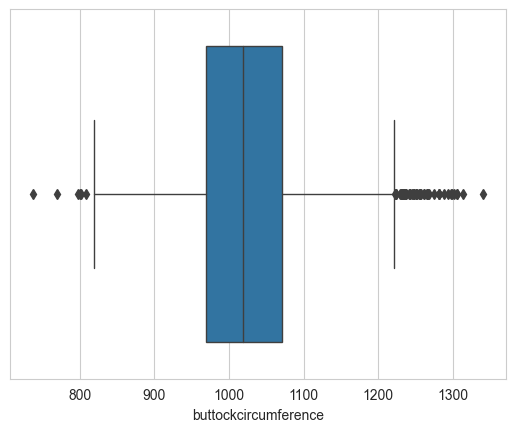

<Figure size 640x480 with 0 Axes>

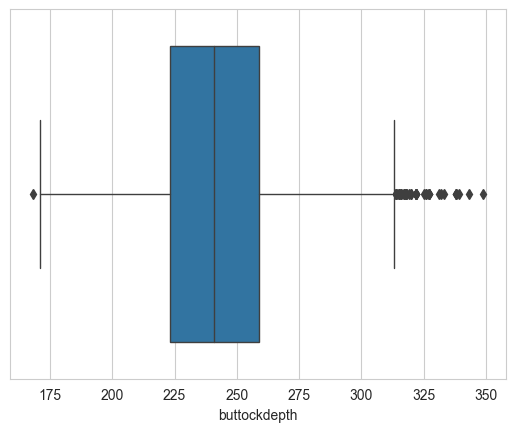

<Figure size 640x480 with 0 Axes>

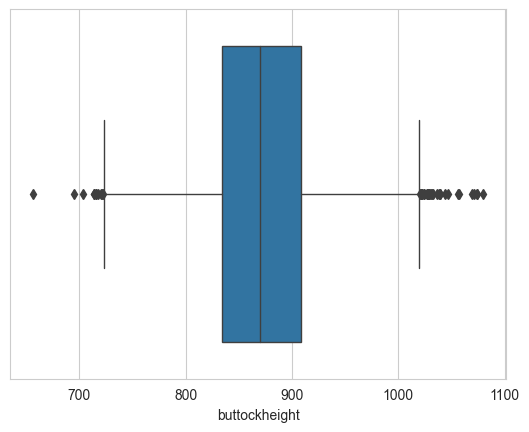

<Figure size 640x480 with 0 Axes>

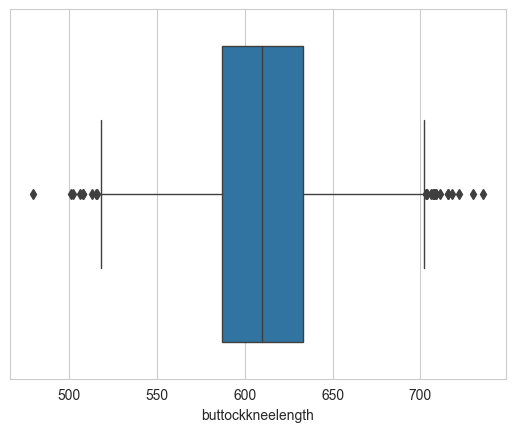

<Figure size 640x480 with 0 Axes>

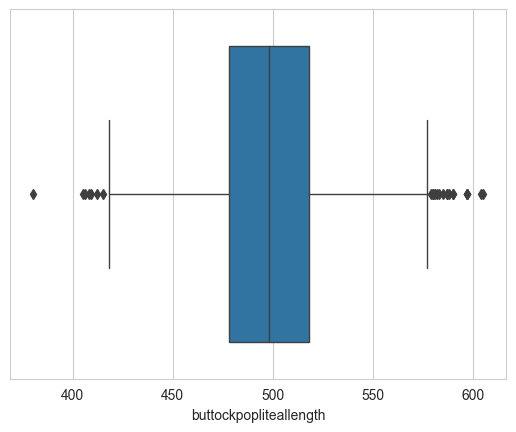

<Figure size 640x480 with 0 Axes>

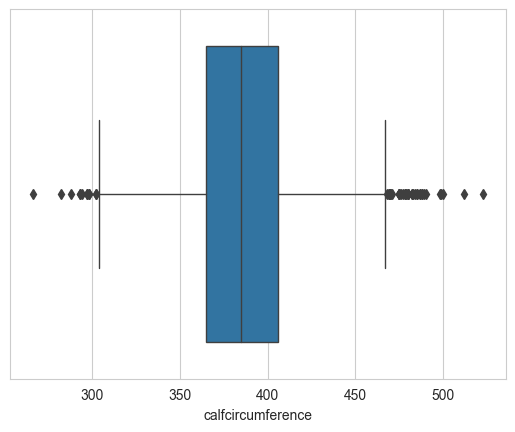

<Figure size 640x480 with 0 Axes>

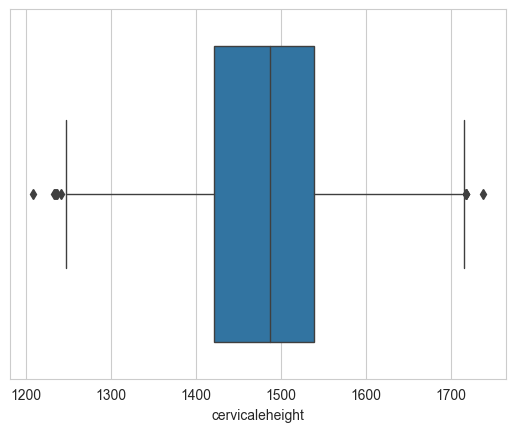

<Figure size 640x480 with 0 Axes>

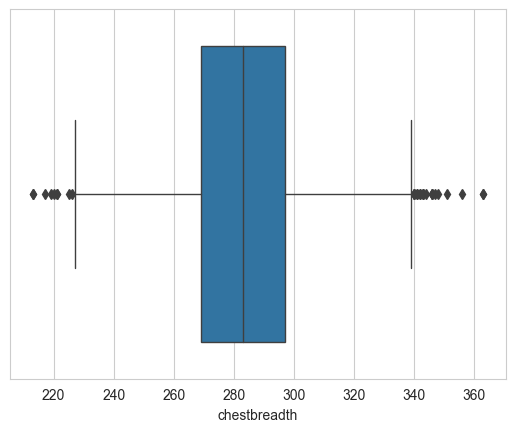

<Figure size 640x480 with 0 Axes>

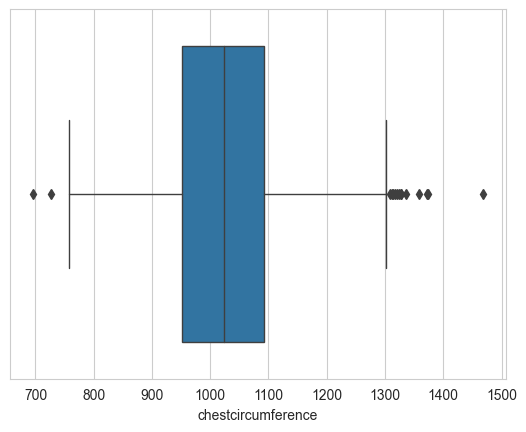

<Figure size 640x480 with 0 Axes>

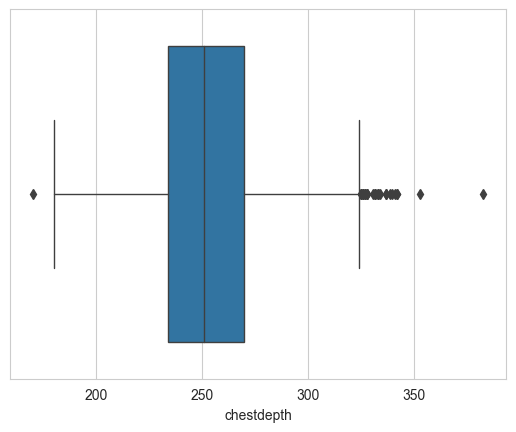

<Figure size 640x480 with 0 Axes>

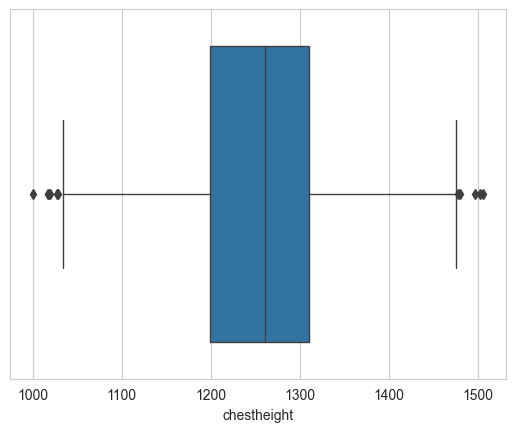

<Figure size 640x480 with 0 Axes>

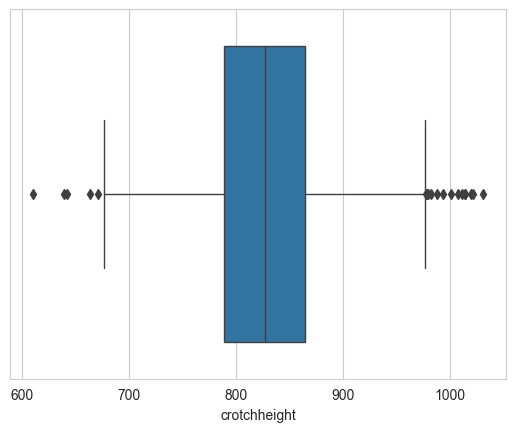

<Figure size 640x480 with 0 Axes>

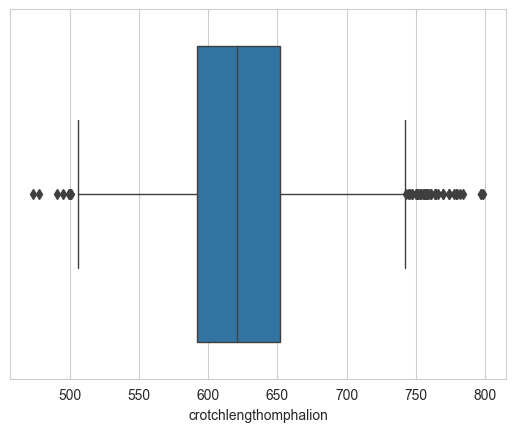

<Figure size 640x480 with 0 Axes>

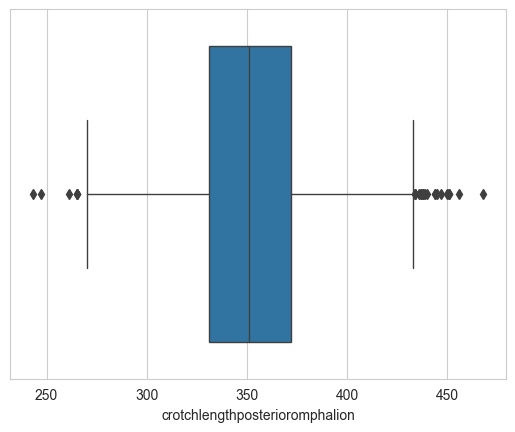

<Figure size 640x480 with 0 Axes>

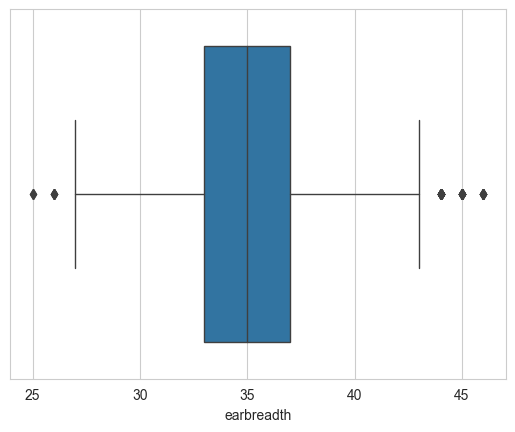

<Figure size 640x480 with 0 Axes>

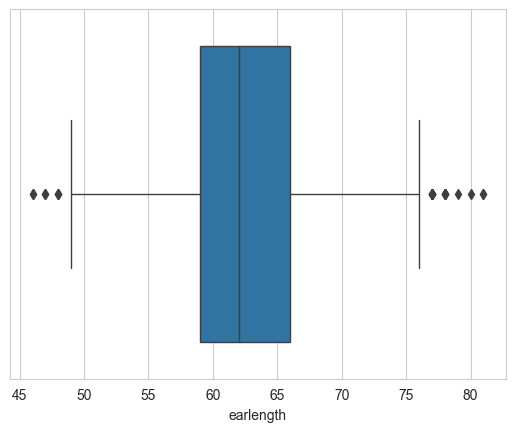

<Figure size 640x480 with 0 Axes>

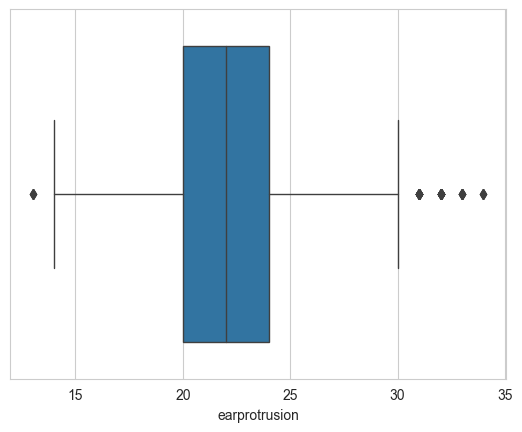

<Figure size 640x480 with 0 Axes>

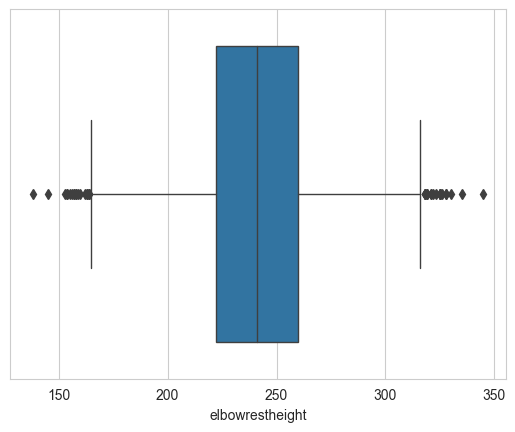

<Figure size 640x480 with 0 Axes>

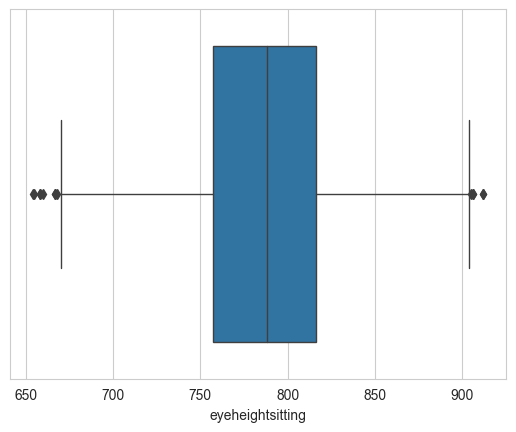

<Figure size 640x480 with 0 Axes>

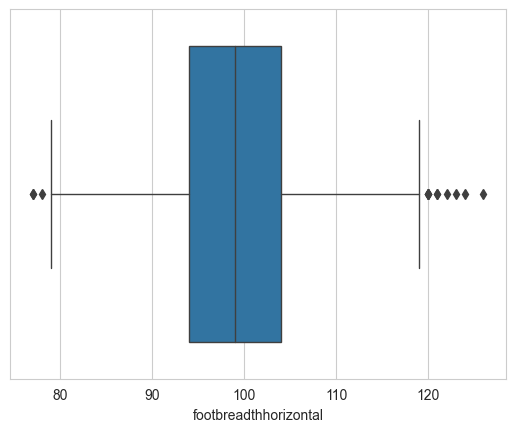

<Figure size 640x480 with 0 Axes>

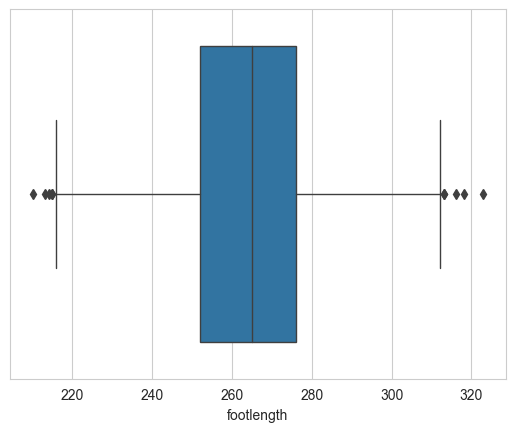

<Figure size 640x480 with 0 Axes>

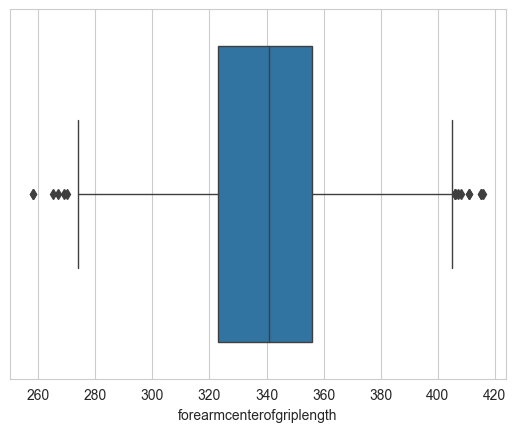

<Figure size 640x480 with 0 Axes>

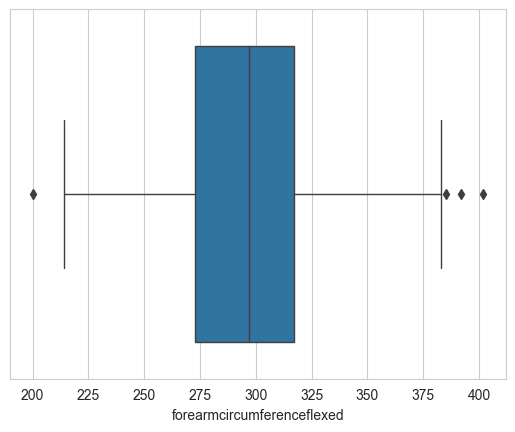

<Figure size 640x480 with 0 Axes>

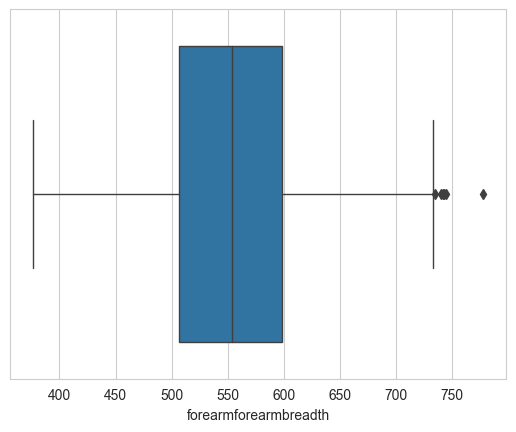

<Figure size 640x480 with 0 Axes>

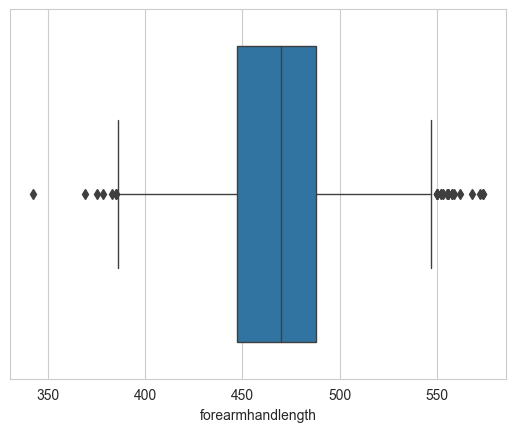

<Figure size 640x480 with 0 Axes>

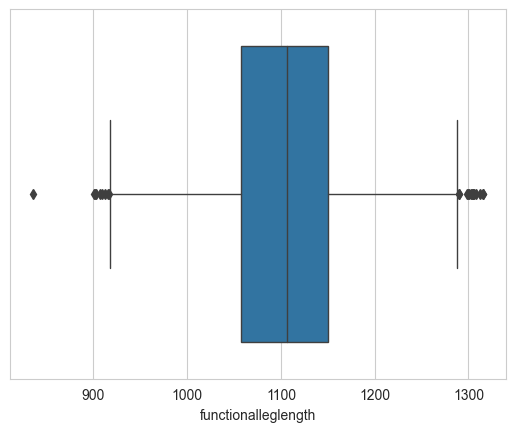

<Figure size 640x480 with 0 Axes>

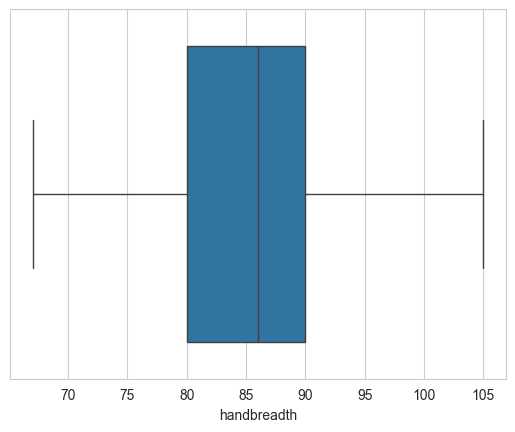

<Figure size 640x480 with 0 Axes>

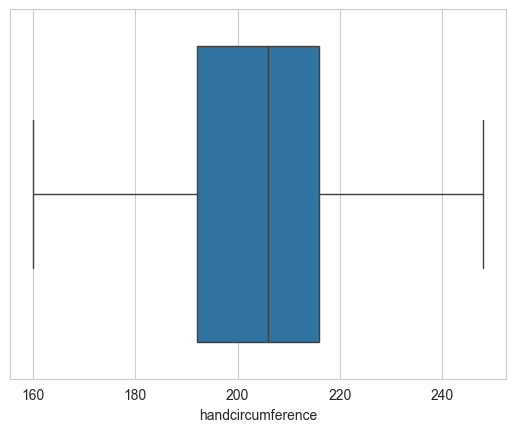

<Figure size 640x480 with 0 Axes>

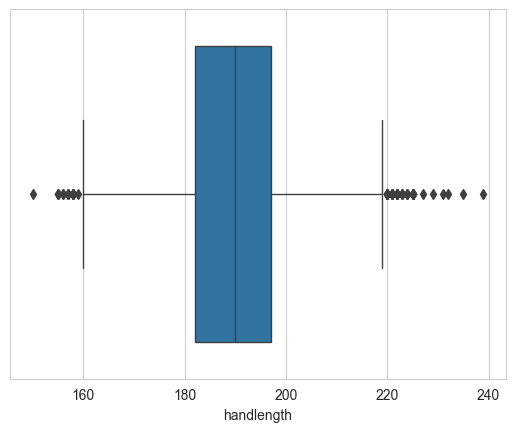

<Figure size 640x480 with 0 Axes>

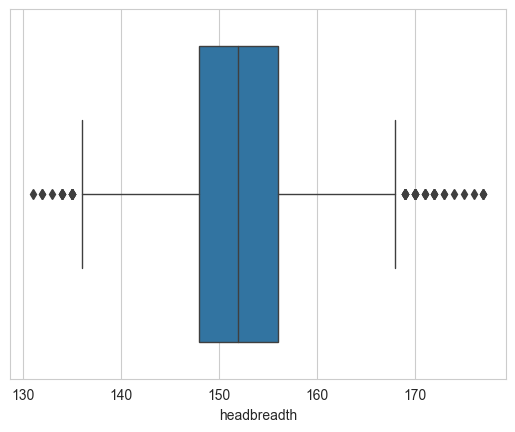

<Figure size 640x480 with 0 Axes>

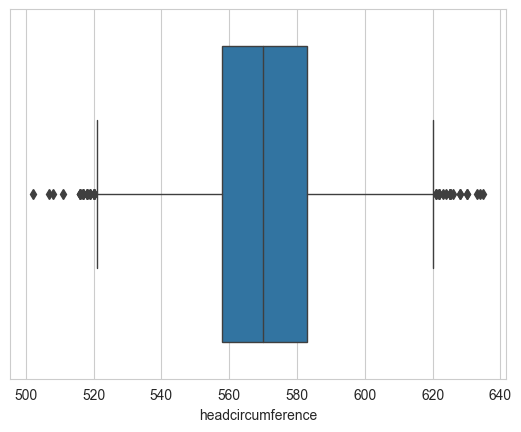

<Figure size 640x480 with 0 Axes>

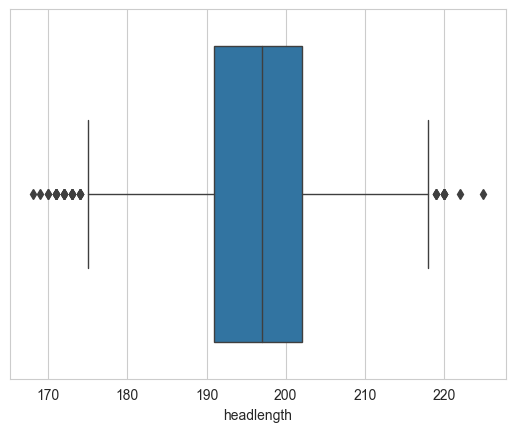

<Figure size 640x480 with 0 Axes>

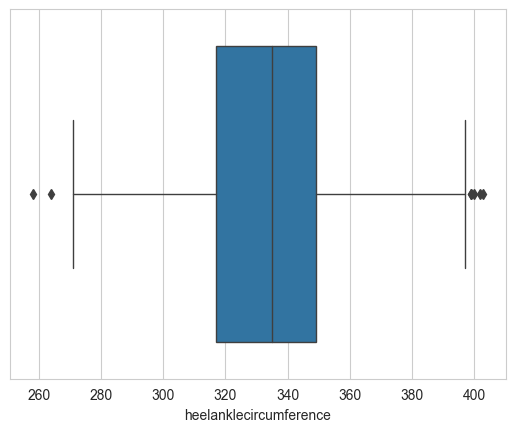

<Figure size 640x480 with 0 Axes>

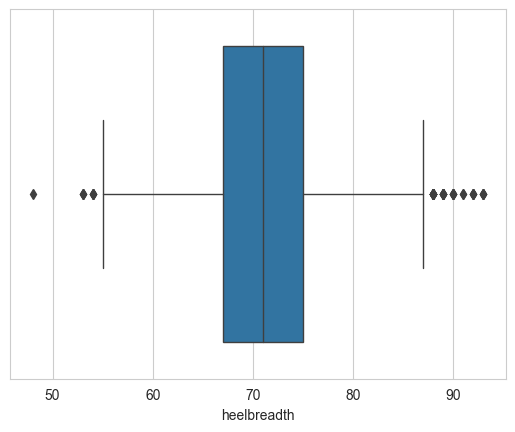

<Figure size 640x480 with 0 Axes>

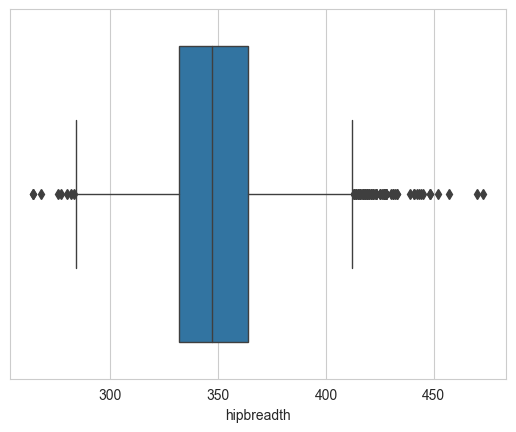

<Figure size 640x480 with 0 Axes>

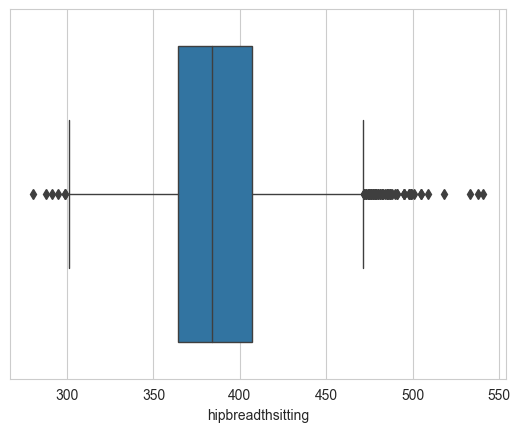

<Figure size 640x480 with 0 Axes>

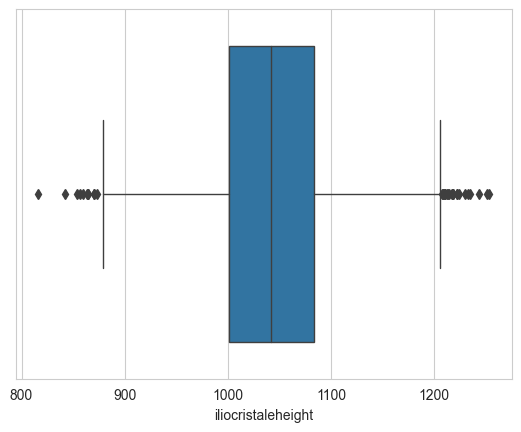

<Figure size 640x480 with 0 Axes>

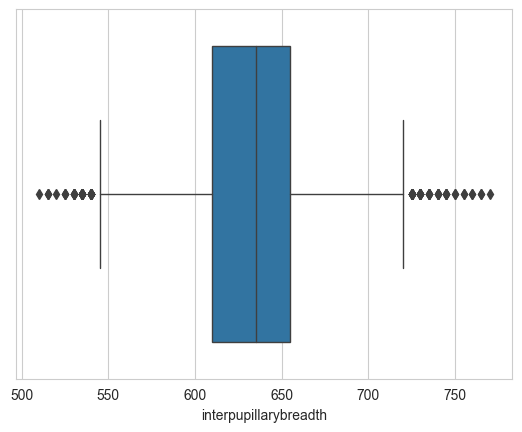

<Figure size 640x480 with 0 Axes>

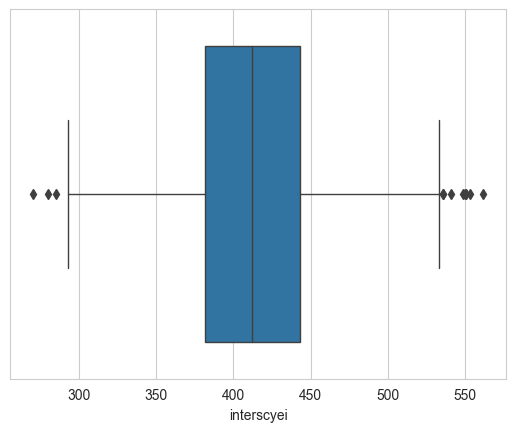

<Figure size 640x480 with 0 Axes>

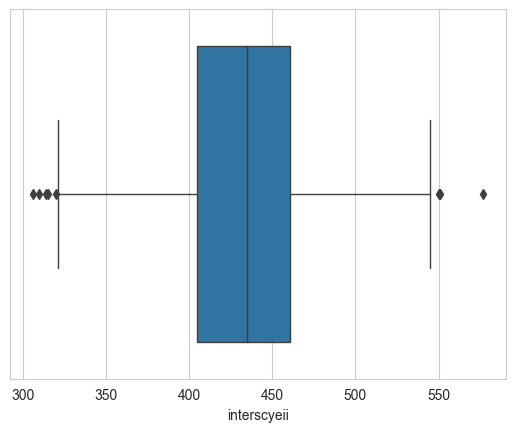

<Figure size 640x480 with 0 Axes>

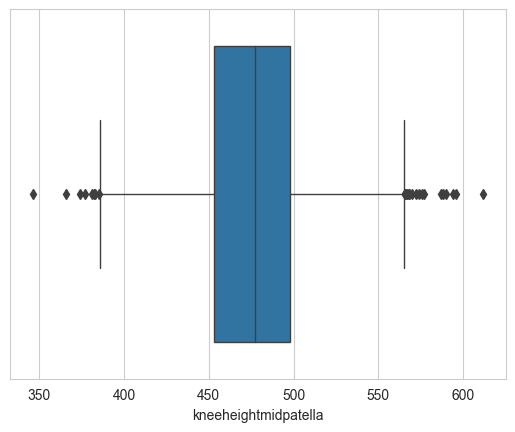

<Figure size 640x480 with 0 Axes>

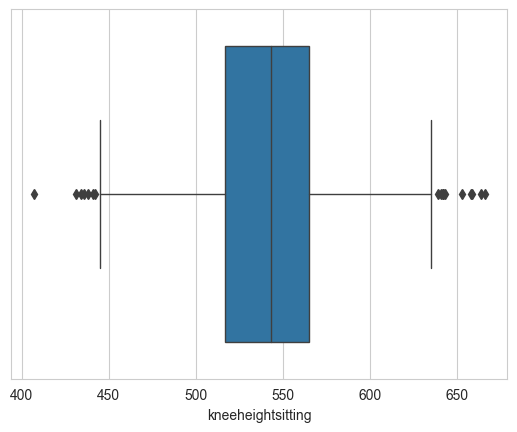

<Figure size 640x480 with 0 Axes>

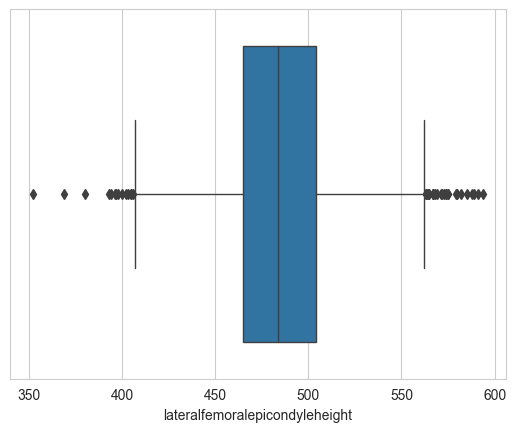

<Figure size 640x480 with 0 Axes>

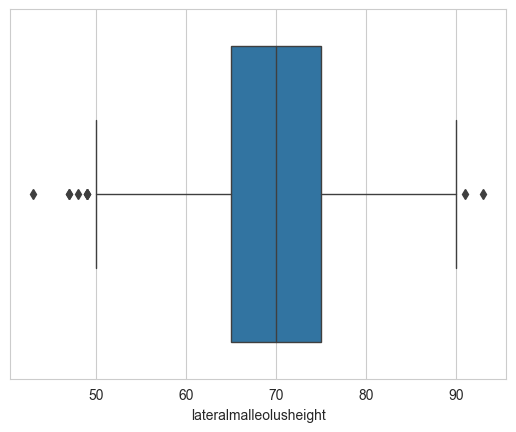

<Figure size 640x480 with 0 Axes>

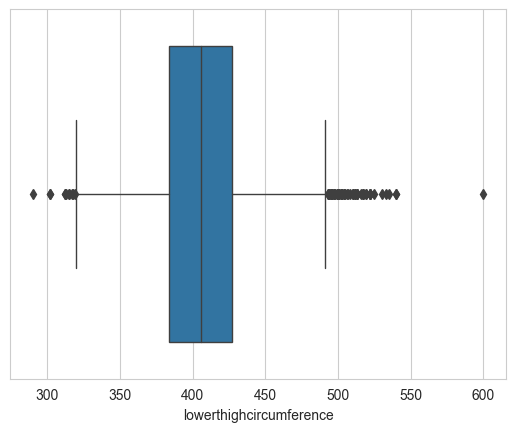

<Figure size 640x480 with 0 Axes>

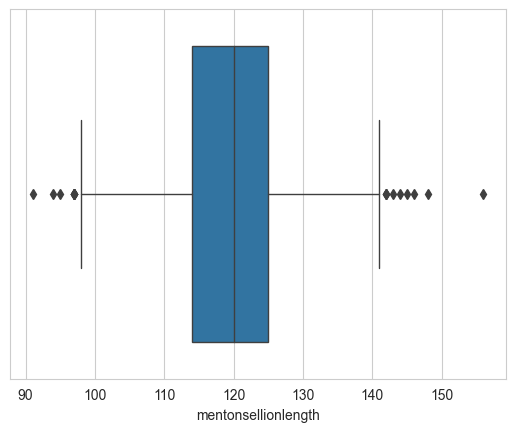

<Figure size 640x480 with 0 Axes>

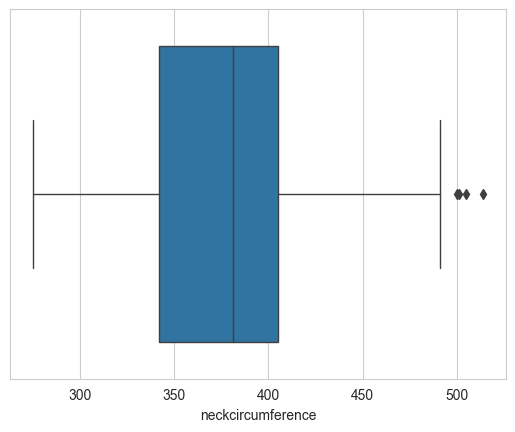

<Figure size 640x480 with 0 Axes>

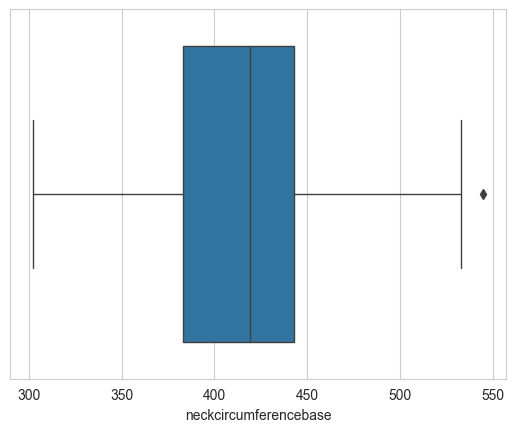

<Figure size 640x480 with 0 Axes>

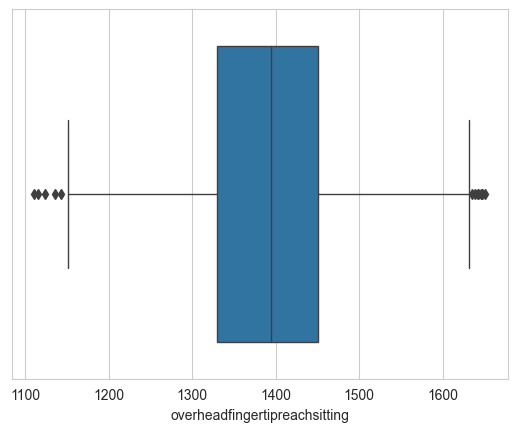

<Figure size 640x480 with 0 Axes>

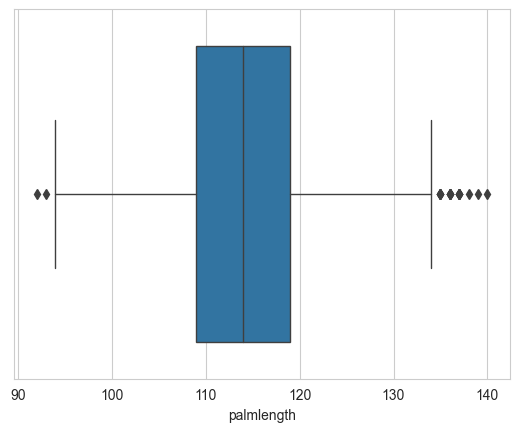

<Figure size 640x480 with 0 Axes>

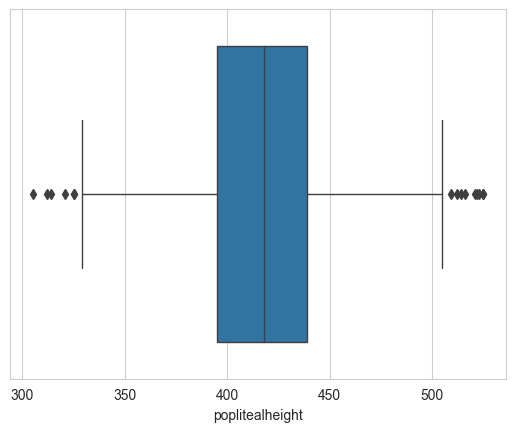

<Figure size 640x480 with 0 Axes>

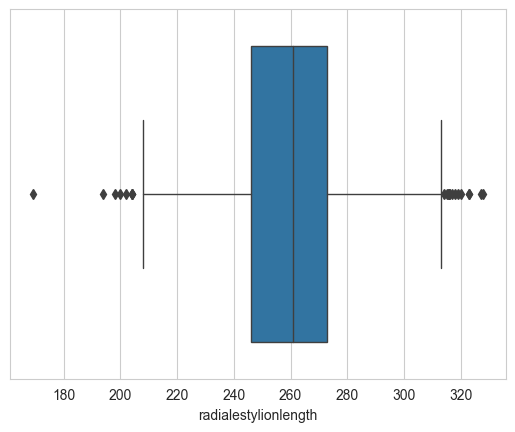

<Figure size 640x480 with 0 Axes>

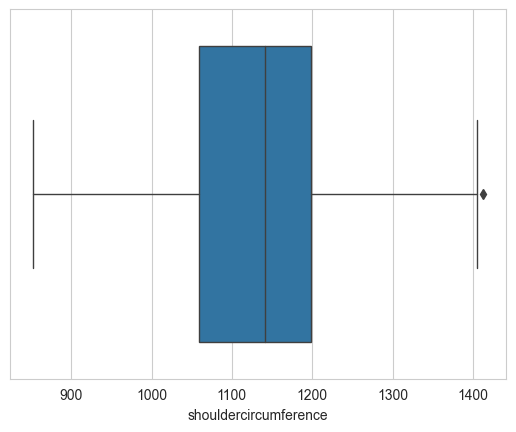

<Figure size 640x480 with 0 Axes>

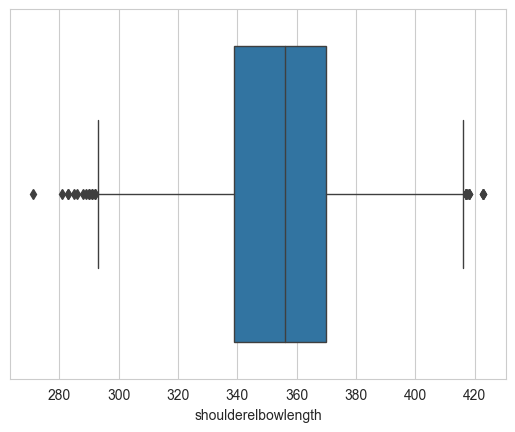

<Figure size 640x480 with 0 Axes>

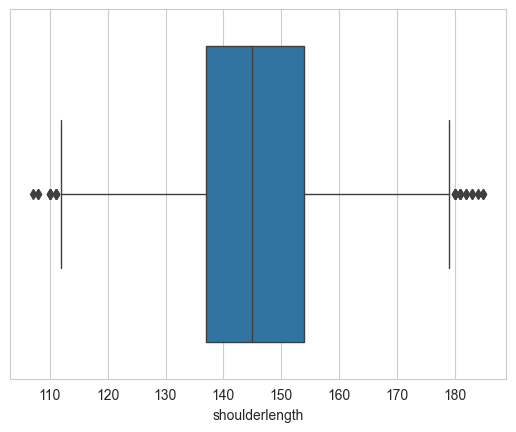

<Figure size 640x480 with 0 Axes>

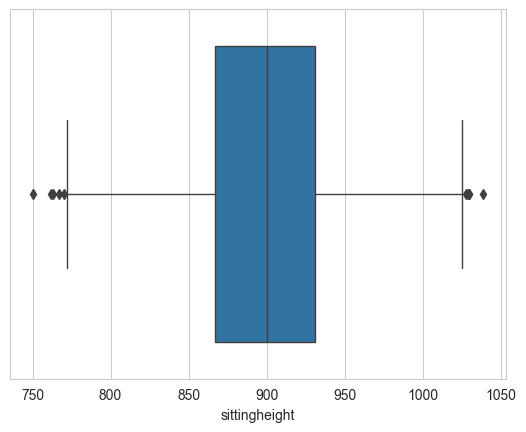

<Figure size 640x480 with 0 Axes>

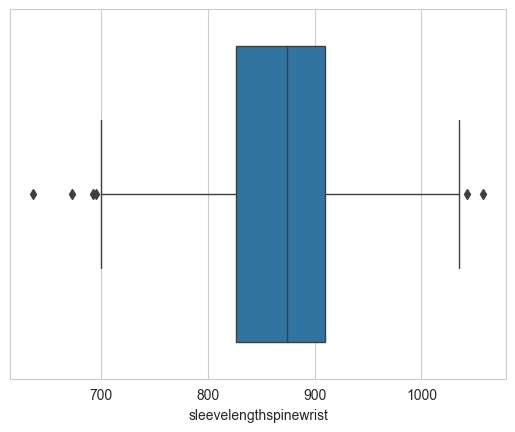

<Figure size 640x480 with 0 Axes>

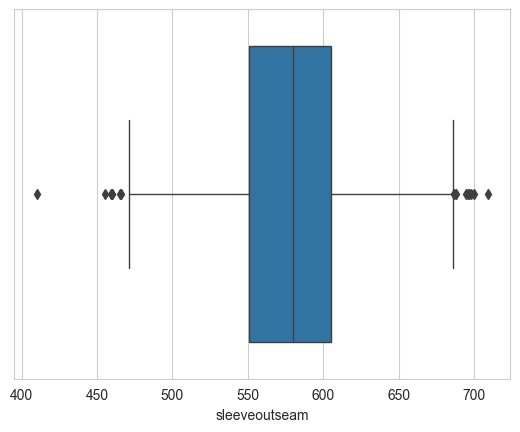

<Figure size 640x480 with 0 Axes>

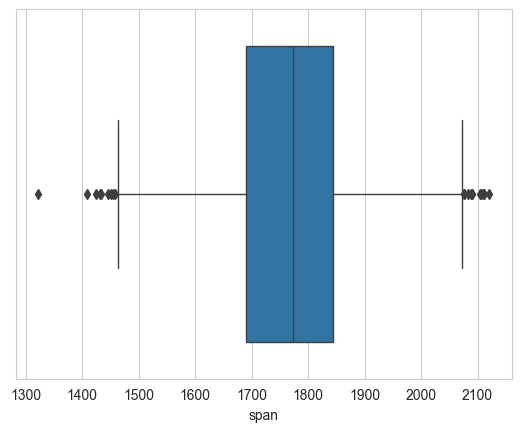

<Figure size 640x480 with 0 Axes>

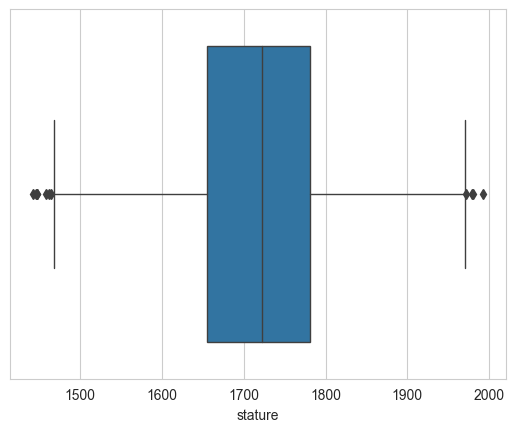

<Figure size 640x480 with 0 Axes>

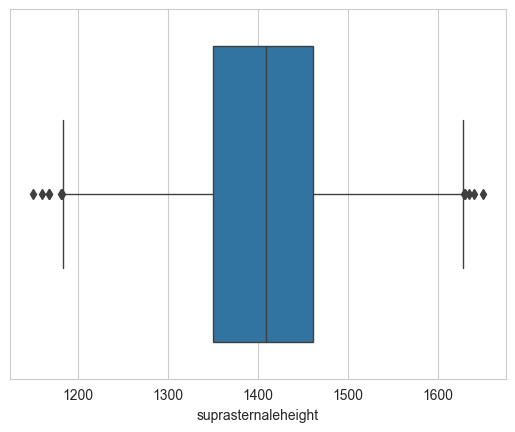

<Figure size 640x480 with 0 Axes>

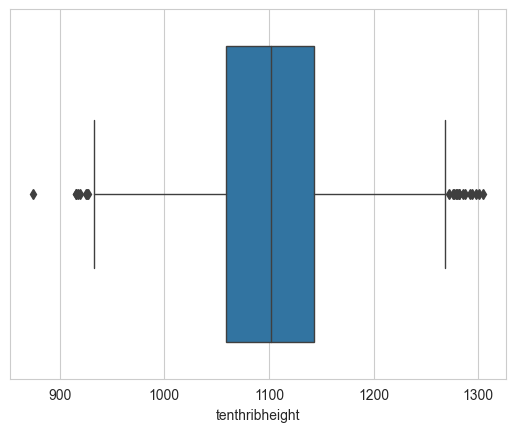

<Figure size 640x480 with 0 Axes>

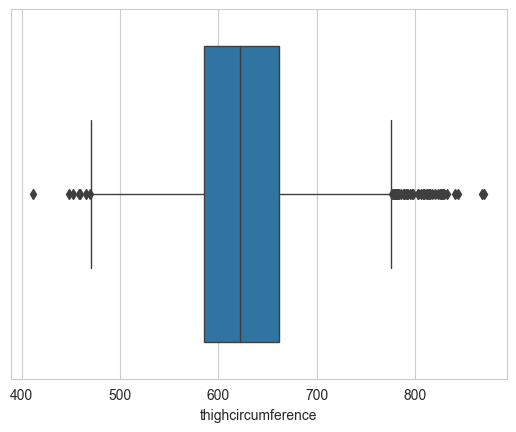

<Figure size 640x480 with 0 Axes>

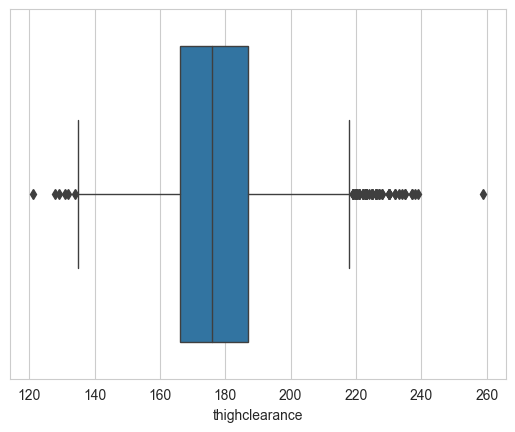

<Figure size 640x480 with 0 Axes>

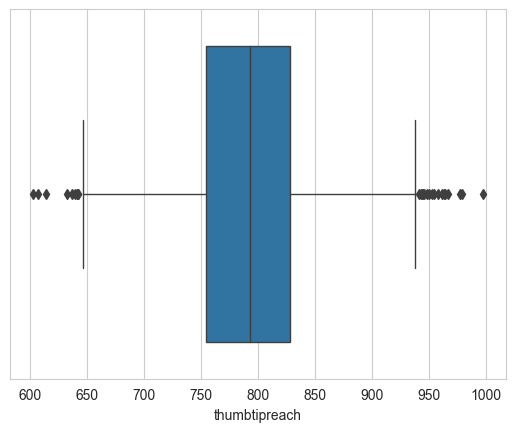

<Figure size 640x480 with 0 Axes>

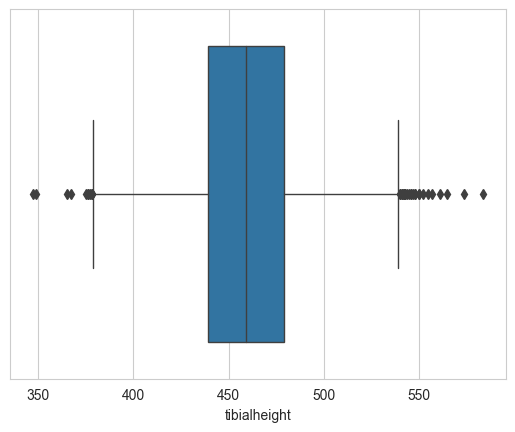

<Figure size 640x480 with 0 Axes>

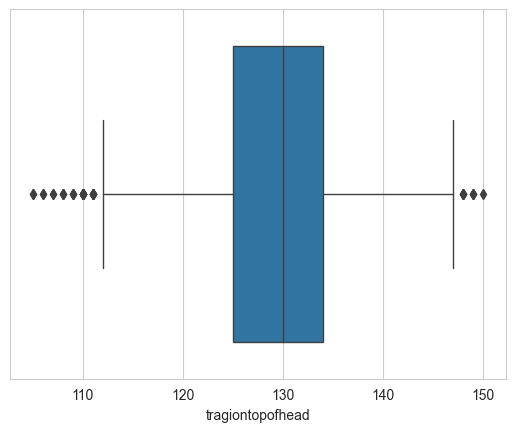

<Figure size 640x480 with 0 Axes>

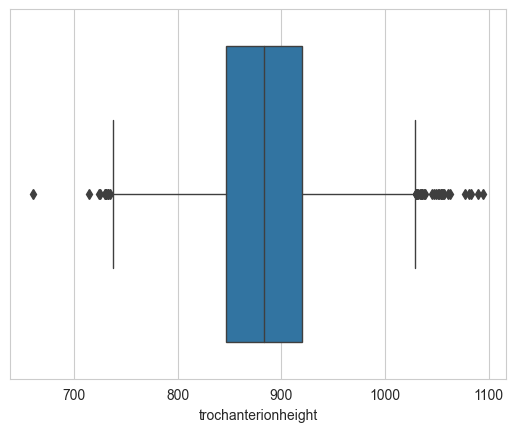

<Figure size 640x480 with 0 Axes>

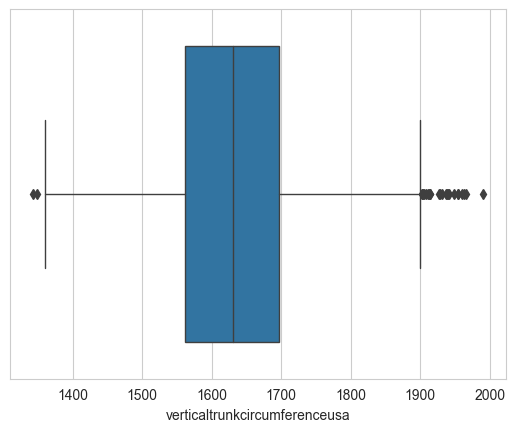

<Figure size 640x480 with 0 Axes>

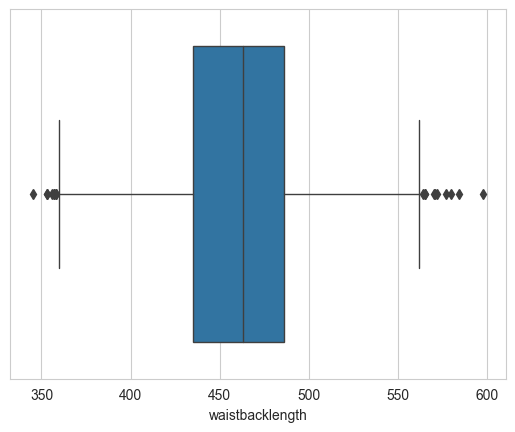

<Figure size 640x480 with 0 Axes>

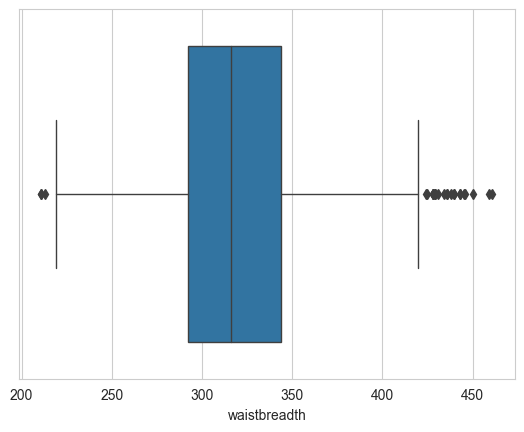

<Figure size 640x480 with 0 Axes>

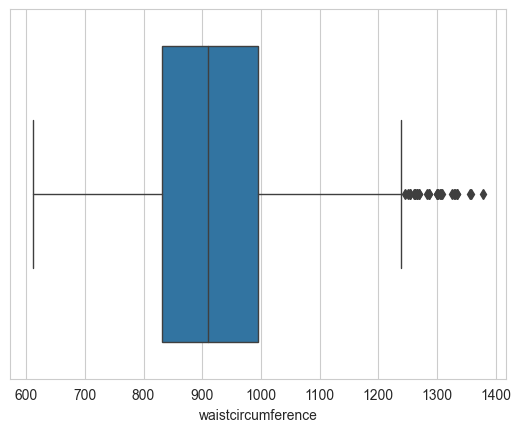

<Figure size 640x480 with 0 Axes>

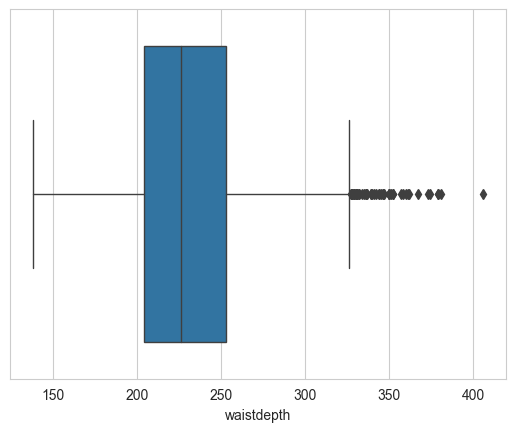

<Figure size 640x480 with 0 Axes>

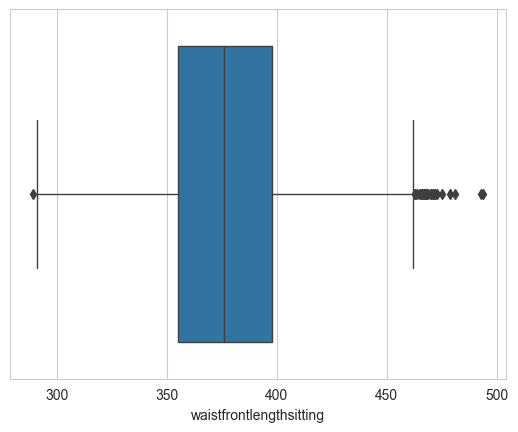

<Figure size 640x480 with 0 Axes>

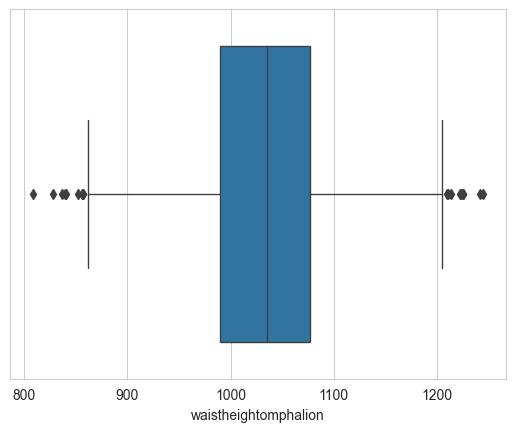

<Figure size 640x480 with 0 Axes>

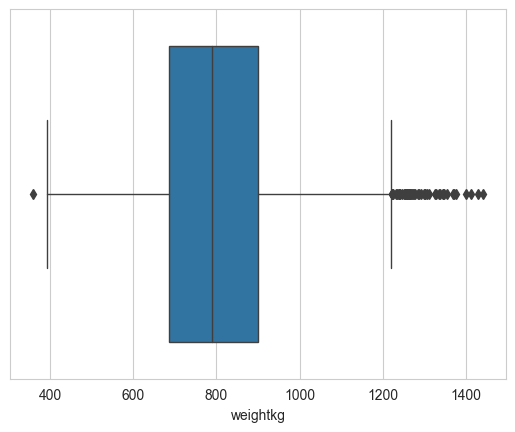

<Figure size 640x480 with 0 Axes>

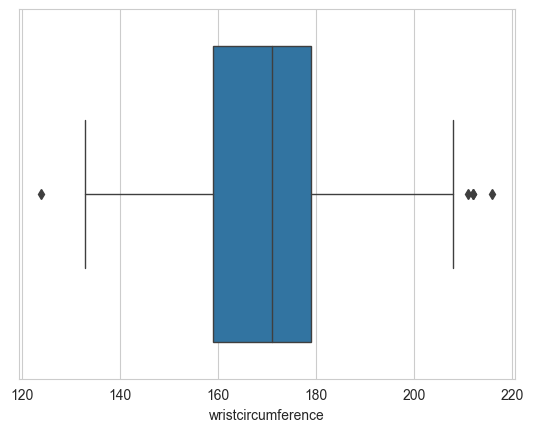

<Figure size 640x480 with 0 Axes>

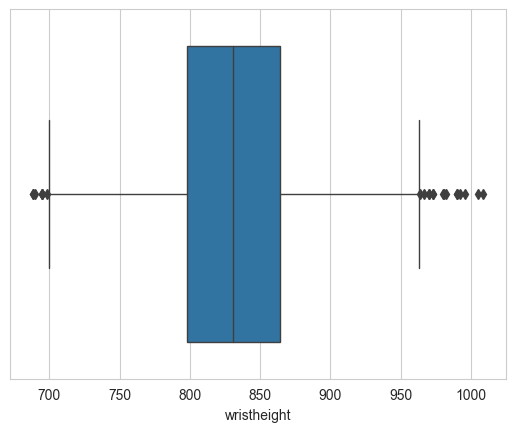

<Figure size 640x480 with 0 Axes>

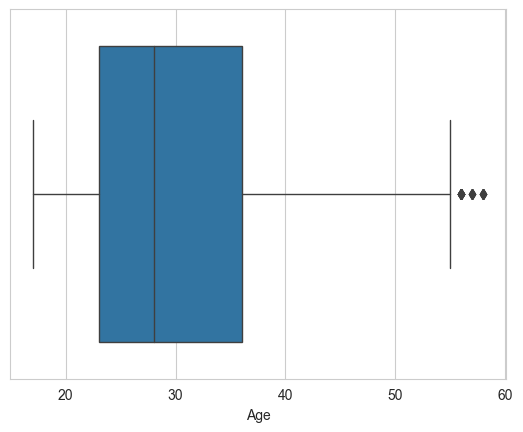

<Figure size 640x480 with 0 Axes>

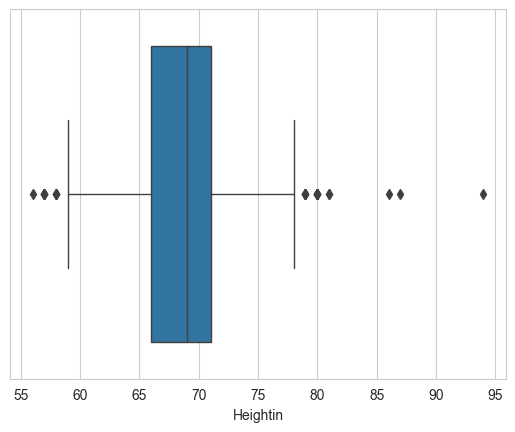

<Figure size 640x480 with 0 Axes>

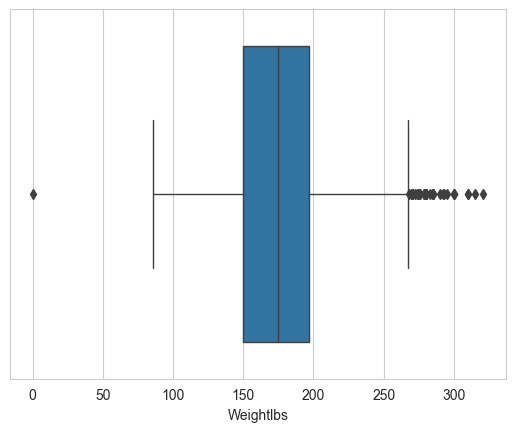

In [139]:
for i in df.select_dtypes(include=['int64']).columns:
    plt.figure()
    plt.tight_layout()
    f, ax = plt.subplots(1, sharex=True)
    sns.boxplot(x = df[i], ax=ax , linewidth= 1.0);


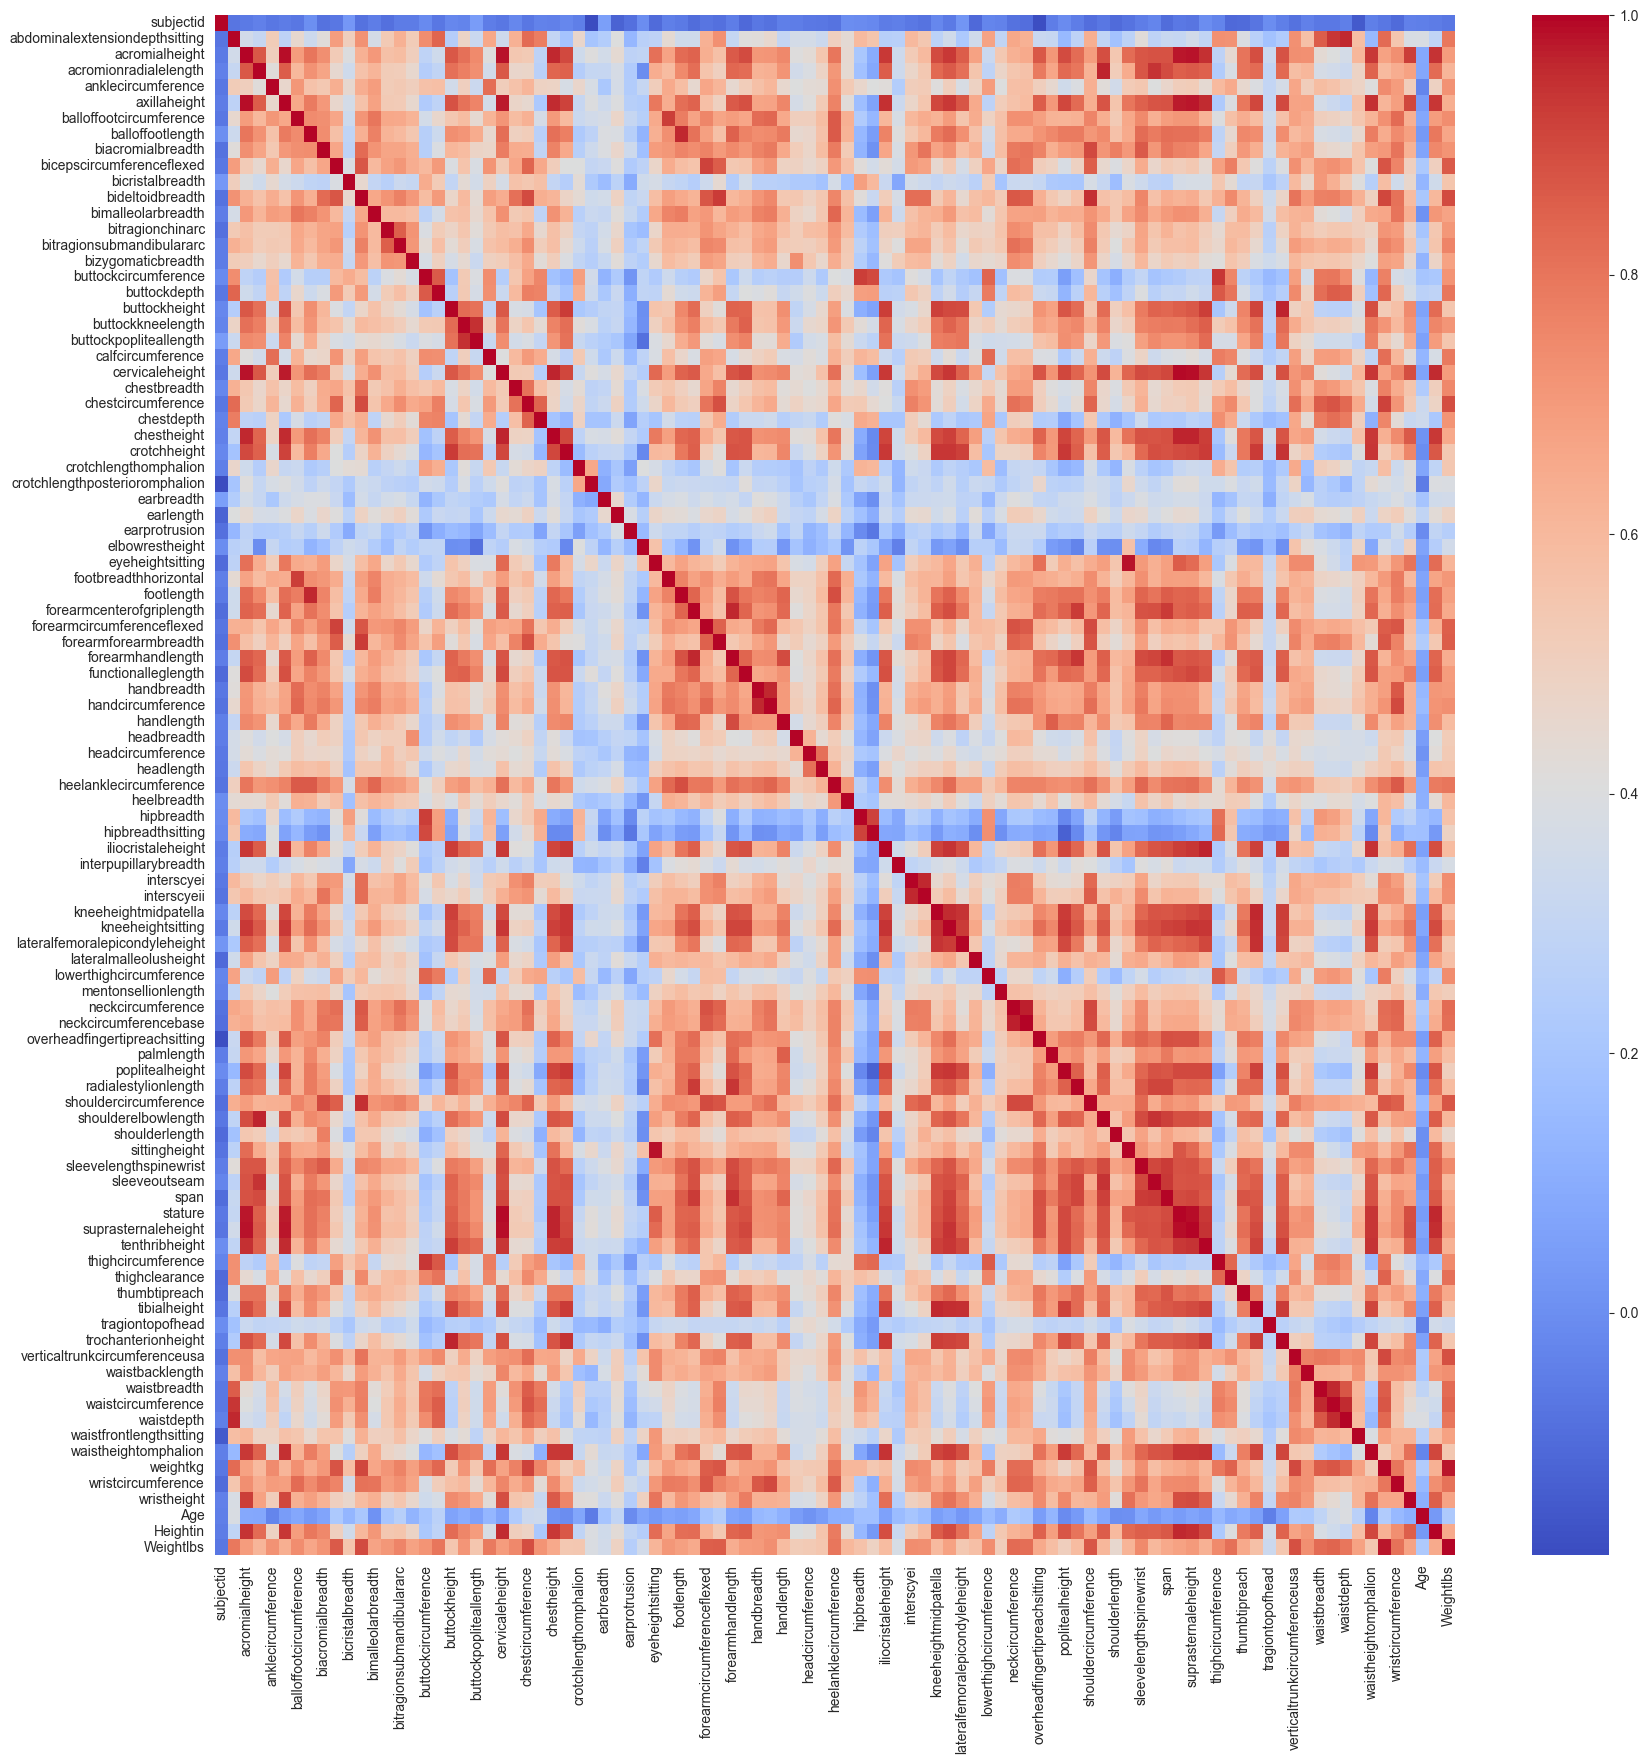

In [140]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="coolwarm");

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [141]:
X = df.drop("DODRace", axis = 1)
y = df["DODRace"]

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [143]:
cat = X.select_dtypes("object").columns

In [144]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [145]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

operations = operations=[('OneHotEncoder',column_trans),('log',LogisticRegression())]

pipe_logistic = Pipeline(steps=operations)

pipe_logistic.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('log', LogisticRegression())])

In [146]:
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [148]:
eval_metric(pipe_logistic, X_train, y_train, X_test, y_test)

Test_Set
[[235   4  21]
 [ 15  46  75]
 [ 17  13 728]]
              precision    recall  f1-score   support

       Black       0.88      0.90      0.89       260
    Hispanic       0.73      0.34      0.46       136
       White       0.88      0.96      0.92       758

    accuracy                           0.87      1154
   macro avg       0.83      0.73      0.76      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[ 940   17   81]
 [  61  169  313]
 [  35   59 2940]]
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91      1038
    Hispanic       0.69      0.31      0.43       543
       White       0.88      0.97      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.83      0.73      0.75      4615
weighted avg       0.86      0.88      0.86      4615



In [149]:
from sklearn.model_selection import cross_validate

In [150]:
operations = operations=[('OneHotEncoder',column_trans),('log',LogisticRegression())]

model = Pipeline(steps=operations)                                

scores = cross_validate(model, X_train, y_train, scoring = ['f1_macro', 'accuracy'], #maximize scores of class 1.
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]


test_f1_macro     0.741885
train_f1_macro    0.755706
test_accuracy     0.871938
train_accuracy    0.878512
dtype: float64

### Logistic Model GridsearchCV

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
from sklearn.metrics import make_scorer, recall_score

In [153]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [154]:
operations = operations=[('OneHotEncoder',column_trans),('log',LogisticRegression())]

model = Pipeline(steps=operations)

param_grid = {
    "log__C": [1, 5, 10],
    'log__penalty': ["l1", "l2"],
    'log__class_weight': ["balanced", None], 
    'log__solver': ['liblinear', 'lbfgs'],
}

logistic_grid = GridSearchCV(estimator=model,
                              param_grid=param_grid,
                              cv=10,
                              scoring = recall_Hispanic,   # By default, the score of the 1 class is max. it does.
                                                 #0 class that max. f1_0 = make_scorer(f1_score, pos_label =0)
                              n_jobs = -1,
                              return_train_score=True)

In [155]:
logistic_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10],
                         'log__class_weight': ['balanced', None],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
            

In [156]:
logistic_grid.best_params_

{'log__C': 1,
 'log__class_weight': 'balanced',
 'log__penalty': 'l2',
 'log__solver': 'lbfgs'}

In [157]:
logistic_grid.best_estimator_


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('log', LogisticRegression(C=1, class_weight='balanced'))])

In [158]:
logistic_grid.best_index_

3

In [159]:
pd.DataFrame(logistic_grid.cv_results_).loc[3, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.677441
mean_train_score     0.72621
Name: 3, dtype: object

In [160]:
eval_metric(logistic_grid, X_train, y_train, X_test, y_test)

Test_Set
[[238  15   7]
 [ 14 100  22]
 [ 23 131 604]]
              precision    recall  f1-score   support

       Black       0.87      0.92      0.89       260
    Hispanic       0.41      0.74      0.52       136
       White       0.95      0.80      0.87       758

    accuracy                           0.82      1154
   macro avg       0.74      0.82      0.76      1154
weighted avg       0.87      0.82      0.83      1154


Train_Set
[[ 938   75   25]
 [  42  395  106]
 [  53  528 2453]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91      1038
    Hispanic       0.40      0.73      0.51       543
       White       0.95      0.81      0.87      3034

    accuracy                           0.82      4615
   macro avg       0.75      0.81      0.76      4615
weighted avg       0.87      0.82      0.84      4615



In [161]:
pip install scikit-plot

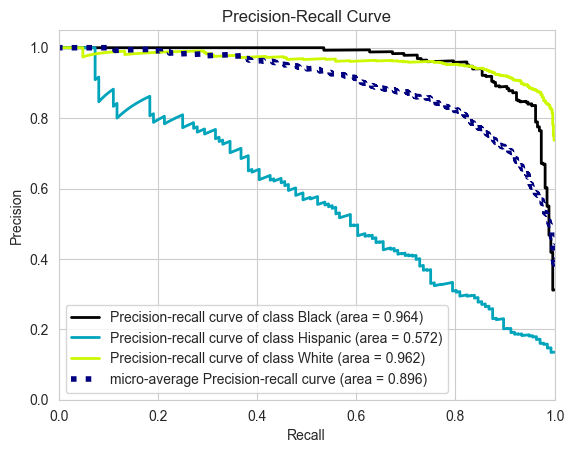

In [162]:
from scikitplot.metrics import plot_roc, precision_recall_curve, plot_precision_recall

operations = operations=[('OneHotEncoder',column_trans),('log',LogisticRegression(C=1, class_weight='balanced', max_iter=10000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba);
plt.show();

In [163]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, average_precision_score

In [164]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.5718053395466738

In [165]:
y_pred = logistic_grid.predict(X_test)

lm_ap = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
lm_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
lm_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [166]:
from sklearn.svm import SVC

In [167]:
operations = [('OneHotEncoder',column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

svc_model = Pipeline(steps=operations)

In [168]:
svc_model.fit(X_train , y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [169]:
eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [ 13  90  33]
 [ 19 132 607]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       260
    Hispanic       0.38      0.66      0.49       136
       White       0.94      0.80      0.86       758

    accuracy                           0.81      1154
   macro avg       0.73      0.80      0.75      1154
weighted avg       0.86      0.81      0.83      1154


Train_Set
[[ 979   34   25]
 [  31  434   78]
 [  48  449 2537]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.47      0.80      0.59       543
       White       0.96      0.84      0.89      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [170]:
operations = [('OneHotEncoder',column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)                                

scores = cross_validate(model, X_train, y_train, scoring = ['f1_macro'], #maximize scores of class 1.
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_f1_macro     0.736459
train_f1_macro    0.806057
dtype: float64

###  SVC Model GridsearchCV

In [171]:
param_grid = {'svc__C': np.linspace(1,1.3, 10),
              'svc__gamma' : ["scale","auto"]    
            }

In [172]:
operations = [('OneHotEncoder',column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations) 

svc_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              refit=True,
                              n_jobs=-1)

svc_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                      

In [173]:
svc_model_grid.best_params_

{'svc__C': 1.3, 'svc__gamma': 'scale'}

In [174]:
svc_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('svc', SVC(C=1.3, class_weight='balanced', random_state=101))])

In [175]:
eval_metric(svc_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [ 13  92  31]
 [ 21 122 615]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       260
    Hispanic       0.40      0.68      0.51       136
       White       0.94      0.81      0.87       758

    accuracy                           0.82      1154
   macro avg       0.74      0.80      0.76      1154
weighted avg       0.86      0.82      0.83      1154


Train_Set
[[ 986   29   23]
 [  29  443   71]
 [  48  419 2567]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1038
    Hispanic       0.50      0.82      0.62       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



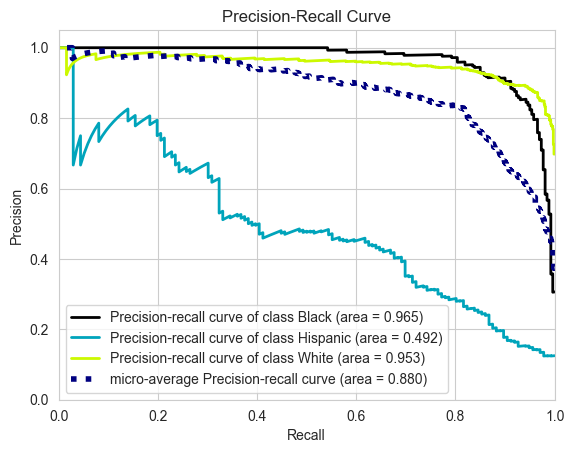

In [176]:
from scikitplot.metrics import plot_roc, precision_recall_curve, plot_precision_recall

operations = [('OneHotEncoder',column_trans), ("svc", SVC(C=1.3, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function=model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test,decision_function)
plt.show();


In [177]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.5718053395466738

In [178]:
y_pred = svc_model_grid.predict(X_test)

svc_ap = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [179]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [180]:
operations = [('OneHotEncoder',column_trans), ("rfc", RandomForestClassifier())]

rfc_model = Pipeline(steps=operations)

In [181]:
rfc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('rfc', RandomForestClassifier())])

In [182]:
eval_metric(rfc_model, X_train, y_train, X_test, y_test)

Test_Set
[[209   1  50]
 [ 16   7 113]
 [ 18   4 736]]
              precision    recall  f1-score   support

       Black       0.86      0.80      0.83       260
    Hispanic       0.58      0.05      0.09       136
       White       0.82      0.97      0.89       758

    accuracy                           0.82      1154
   macro avg       0.75      0.61      0.60      1154
weighted avg       0.80      0.82      0.78      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [183]:
operations = [('OneHotEncoder',column_trans), ("rfc", RandomForestClassifier())]

model = Pipeline(steps=operations)                                

scores = cross_validate(model, X_train, y_train, scoring = ['f1_macro'], #maximize scores of class 1.
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_f1_macro     0.605473
train_f1_macro    1.000000
dtype: float64

### RF Model GridsearchCV

In [184]:
param_grid = {
             'rfc__criterion': ["entropy","gini"],
             'rfc__max_depth':[7,8],
             'rfc__max_features':['auto', 0.8],
             'rfc__max_leaf_nodes': [180,200],
             'rfc__n_estimators':[50,100],
             }

In [185]:
operations = [('OneHotEncoder',column_trans), ("rfc", RandomForestClassifier())]

model = Pipeline(steps=operations) 

rfc_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              refit=True,
                              n_jobs=-1)

rfc_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__criterion': ['entropy', 'gini'],
                         'rfc__max_depth': [7, 8],
                         'rfc__max_features': ['auto', 0.8],
                         'rfc__max_leaf_nodes': [180, 200],
                         'rfc__n_estimators': [50, 100]},
     

In [186]:
rfc_model_grid.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': 8,
 'rfc__max_features': 0.8,
 'rfc__max_leaf_nodes': 200,
 'rfc__n_estimators': 50}

In [187]:
rfc_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('rfc',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        max_features=0.8, max_leaf_nodes=200,
                                        n_estimators=50))])

In [188]:
eval_metric(rfc_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[201   0  59]
 [ 12   8 116]
 [ 25   2 731]]
              precision    recall  f1-score   support

       Black       0.84      0.77      0.81       260
    Hispanic       0.80      0.06      0.11       136
       White       0.81      0.96      0.88       758

    accuracy                           0.81      1154
   macro avg       0.82      0.60      0.60      1154
weighted avg       0.81      0.81      0.77      1154


Train_Set
[[ 945    0   93]
 [  10  181  352]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       0.99      0.91      0.95      1038
    Hispanic       1.00      0.33      0.50       543
       White       0.87      1.00      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.95      0.75      0.79      4615
weighted avg       0.91      0.90      0.88      4615



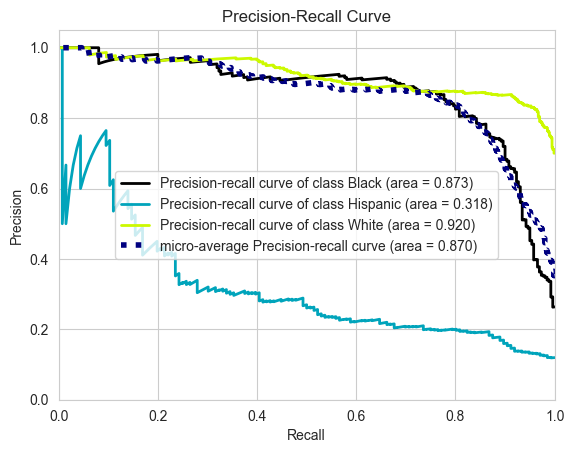

In [189]:
operations = [('OneHotEncoder',column_trans), ("rfc", RandomForestClassifier(max_depth=8, max_features=0.8, max_leaf_nodes=180))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba);
plt.show();

In [190]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.3181870551135504

In [191]:
y_pred = rfc_model_grid.predict(X_test)

rfc_ap = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rfc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rfc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [192]:
from xgboost import XGBClassifier

In [193]:
operations = [('OneHotEncoder',column_trans), ("xgb", XGBClassifier())]

xgb_model = Pipeline(steps=operations)

xgb_model.fit(X_train, y_train, xgb__eval_metric='logloss')

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, en...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               

In [194]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[228   3  29]
 [ 15  29  92]
 [ 13  15 730]]
              precision    recall  f1-score   support

       Black       0.89      0.88      0.88       260
    Hispanic       0.62      0.21      0.32       136
       White       0.86      0.96      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.68      0.70      1154
weighted avg       0.84      0.86      0.83      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [195]:
param_grid = {"xgb__n_estimators":[20, 40],
              'xgb__max_depth':[1,2],
              "xgb__learning_rate": [0.03, 0.05],
              "xgb__subsample":[0.8, 1],
              "xgb__colsample_bytree":[0.8, 1]}

In [196]:
operations = [('OneHotEncoder',column_trans), ("xgb", XGBClassifier())]

model = Pipeline(steps=operations) 

xgb_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              refit=True,
                              n_jobs=-1)

xgb_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[23:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=...
                                                      predic

In [197]:
xgb_model_grid.best_params_

{'xgb__colsample_bytree': 1,
 'xgb__learning_rate': 0.05,
 'xgb__max_depth': 2,
 'xgb__n_estimators': 40,
 'xgb__subsample': 0.8}

In [198]:
xgb_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, en...
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=40,
                               n_jobs=4

In [199]:
eval_metric(xgb_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[136   1 123]
 [ 11   2 123]
 [ 18   2 738]]
              precision    recall  f1-score   support

       Black       0.82      0.52      0.64       260
    Hispanic       0.40      0.01      0.03       136
       White       0.75      0.97      0.85       758

    accuracy                           0.76      1154
   macro avg       0.66      0.50      0.51      1154
weighted avg       0.73      0.76      0.70      1154


Train_Set
[[ 557    5  476]
 [  52   20  471]
 [  30    4 3000]]
              precision    recall  f1-score   support

       Black       0.87      0.54      0.66      1038
    Hispanic       0.69      0.04      0.07       543
       White       0.76      0.99      0.86      3034

    accuracy                           0.78      4615
   macro avg       0.77      0.52      0.53      4615
weighted avg       0.78      0.78      0.72      4615



[23:20:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


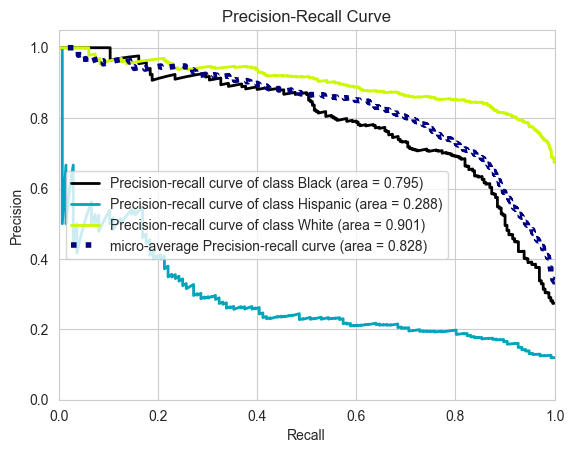

In [200]:
operations = [('OneHotEncoder',column_trans), ("xgb", XGBClassifier(n_estimators=40, max_depth=2, learning_rate=0.05, subsample=0.8, colsample_bytree=1))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba);
plt.show();

In [201]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.28849625899606085

In [202]:
y_pred = xgb_model_grid.predict(X_test)

xgb_ap = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


# Model Comparison

[Text(0, 0, '0.735'),
 Text(0, 0, '0.676'),
 Text(0, 0, '0.059'),
 Text(0, 0, '0.015')]

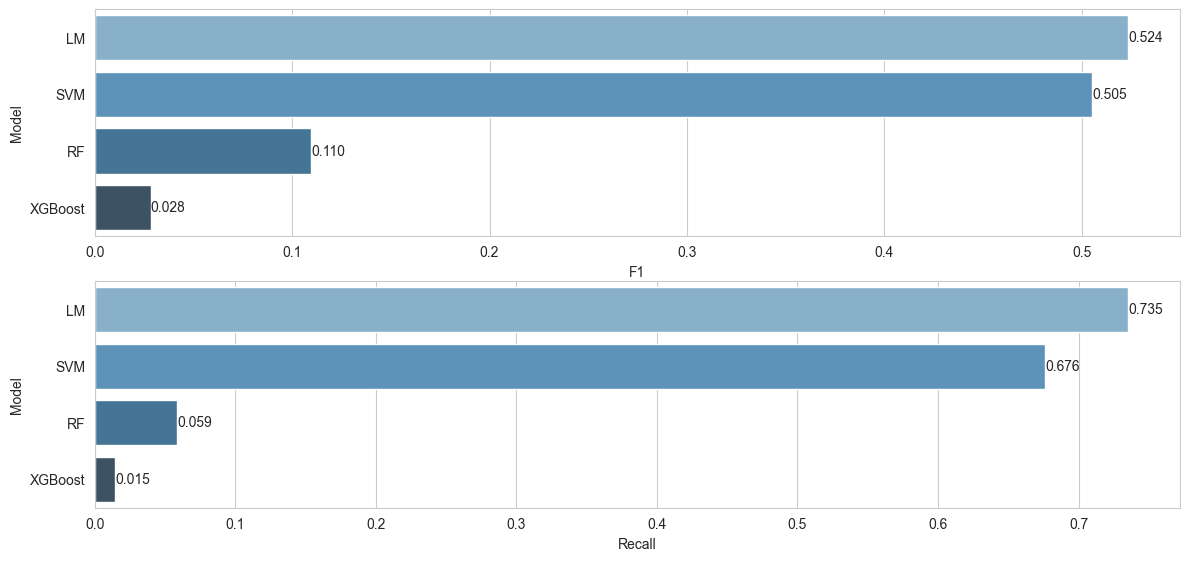

In [203]:
compare = pd.DataFrame({"Model": ["LM","SVM","RF","XGBoost"],
                        "F1": [lm_f1[0], svc_f1[0], rfc_f1[0], xgb_f1[0]],
                        "Recall": [lm_recall[0], svc_recall[0], rfc_recall[0], xgb_recall[0]]
                        })

    
plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [204]:
!pip install imblearn

     -------------------------------------- 225.4/225.4 kB 2.3 MB/s eta 0:00:00


In [224]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [206]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [207]:
X_train_ohe = column_trans.fit_transform(X_train)

In [208]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train_ohe, y_train)

In [209]:
X_over.shape

(9102, 108)

In [210]:
y_over.value_counts()

Hispanic    3034
White       3034
Black       3034
Name: DODRace, dtype: int64

In [211]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_ohe, y_train)

In [212]:
X_under.shape

(1629, 108)

In [213]:
y_under.value_counts()

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [214]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [215]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [216]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [217]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [218]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train) #X_resampled_over, y_resampled_over

In [219]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

In [220]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [221]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("log", LogisticRegression(max_iter=10000, random_state=101))] #("scaler", MinMaxScaler())
                                                                             #Don't use class_weight="balanced"

In [225]:
smote_pipeline = imbpipeline(steps=operations)

In [226]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [227]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[237  10  13]
 [ 14  79  43]
 [ 16  48 694]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90       260
    Hispanic       0.58      0.58      0.58       136
       White       0.93      0.92      0.92       758

    accuracy                           0.88      1154
   macro avg       0.80      0.80      0.80      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[ 931   46   61]
 [  46  299  198]
 [  36  173 2825]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91      1038
    Hispanic       0.58      0.55      0.56       543
       White       0.92      0.93      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.80      0.79      0.80      4615
weighted avg       0.88      0.88      0.88      4615



In [229]:
from sklearn.model_selection import cross_val_score, cross_validate

In [231]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [232]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.505971
train_f1_Hispanic           0.553916
test_precision_Hispanic     0.517057
train_precision_Hispanic    0.561536
test_recall_Hispanic        0.496970
train_recall_Hispanic       0.546555
dtype: float64

In [233]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.46622430653903574

In [234]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.40838410810970305

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7376215262514891

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [235]:
!pip install shap

     -------------------------------------- 435.3/435.3 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 5.7 MB/s eta 0:00:00


In [236]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [237]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[238  15   7]
 [ 16  97  23]
 [ 22 139 597]]
              precision    recall  f1-score   support

       Black       0.86      0.92      0.89       260
    Hispanic       0.39      0.71      0.50       136
       White       0.95      0.79      0.86       758

    accuracy                           0.81      1154
   macro avg       0.73      0.81      0.75      1154
weighted avg       0.87      0.81      0.83      1154


Train_Set
[[ 942   73   23]
 [  45  395  103]
 [  49  539 2446]]
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91      1038
    Hispanic       0.39      0.73      0.51       543
       White       0.95      0.81      0.87      3034

    accuracy                           0.82      4615
   macro avg       0.75      0.81      0.76      4615
weighted avg       0.88      0.82      0.84      4615



In [238]:
model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

scores = cross_validate(model, X_train_trans, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic            0.465875
train_f1_Hispanic           0.514743
test_precision_Hispanic     0.358984
train_precision_Hispanic    0.396669
test_recall_Hispanic        0.664798
train_recall_Hispanic       0.732963
dtype: float64

In [239]:
features = column_trans_shap.get_feature_names_out()
features

array(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__Component_Army National Guard',
       'onehotencoder__Component_Army Reserve',
       'onehotencoder__Component_Regular Army',
       'onehotencoder__Branch_Combat Arms',
       'onehotencoder__Branch_Combat Service Support',
       'onehotencoder__Branch_Combat Support',
       'onehotencoder__WritingPreference_Either hand (No preference)',
       'onehotencoder__WritingPreference_Left hand',
       'onehotencoder__WritingPreference_Right hand',
       'remainder__subjectid',
       'remainder__abdominalextensiondepthsitting',
       'remainder__acromialheight', 'remainder__acromionradialelength',
       'remainder__anklecircumference', 'remainder__axillaheight',
       'remainder__balloffootcircumference',
       'remainder__balloffootlength', 'remainder__biacromialbreadth',
       'remainder__bicepscircumferenceflexed',
       'remainder__bicristalbreadth', 'remainder__bideltoidbreadth',
   

In [240]:
new_features = [i.replace("onehotencoder__", "").replace("remainder__","") for i in features]
new_features

['Gender_Female',
 'Gender_Male',
 'Component_Army National Guard',
 'Component_Army Reserve',
 'Component_Regular Army',
 'Branch_Combat Arms',
 'Branch_Combat Service Support',
 'Branch_Combat Support',
 'WritingPreference_Either hand (No preference)',
 'WritingPreference_Left hand',
 'WritingPreference_Right hand',
 'subjectid',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earb

## Shap values for all data

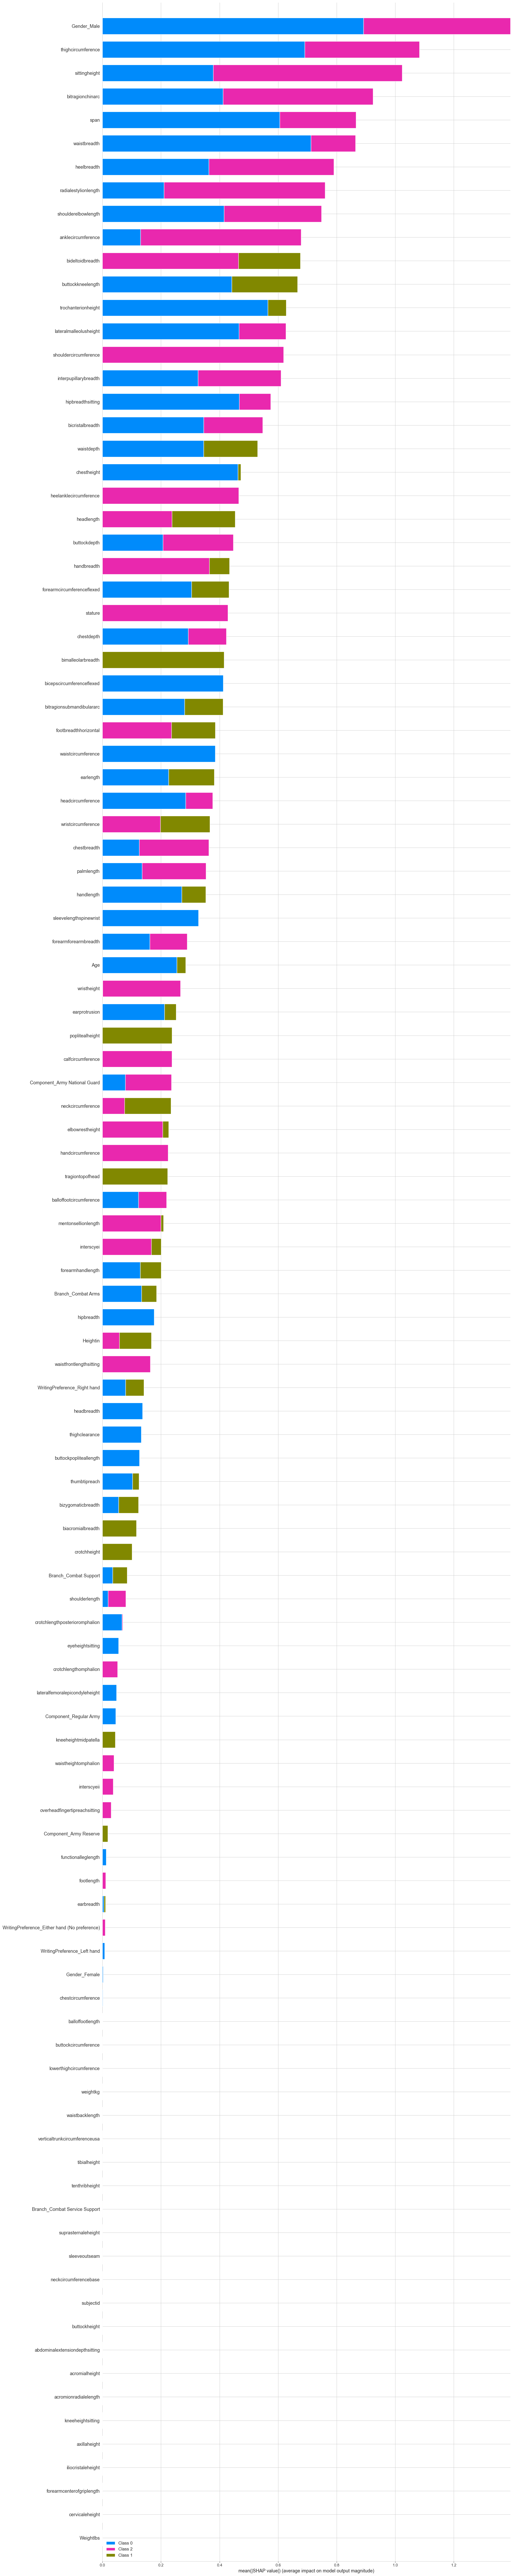

In [243]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans) #LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values,  max_display=300, feature_names = new_features, plot_size=(20,100))

## SHAP for Feature Selection

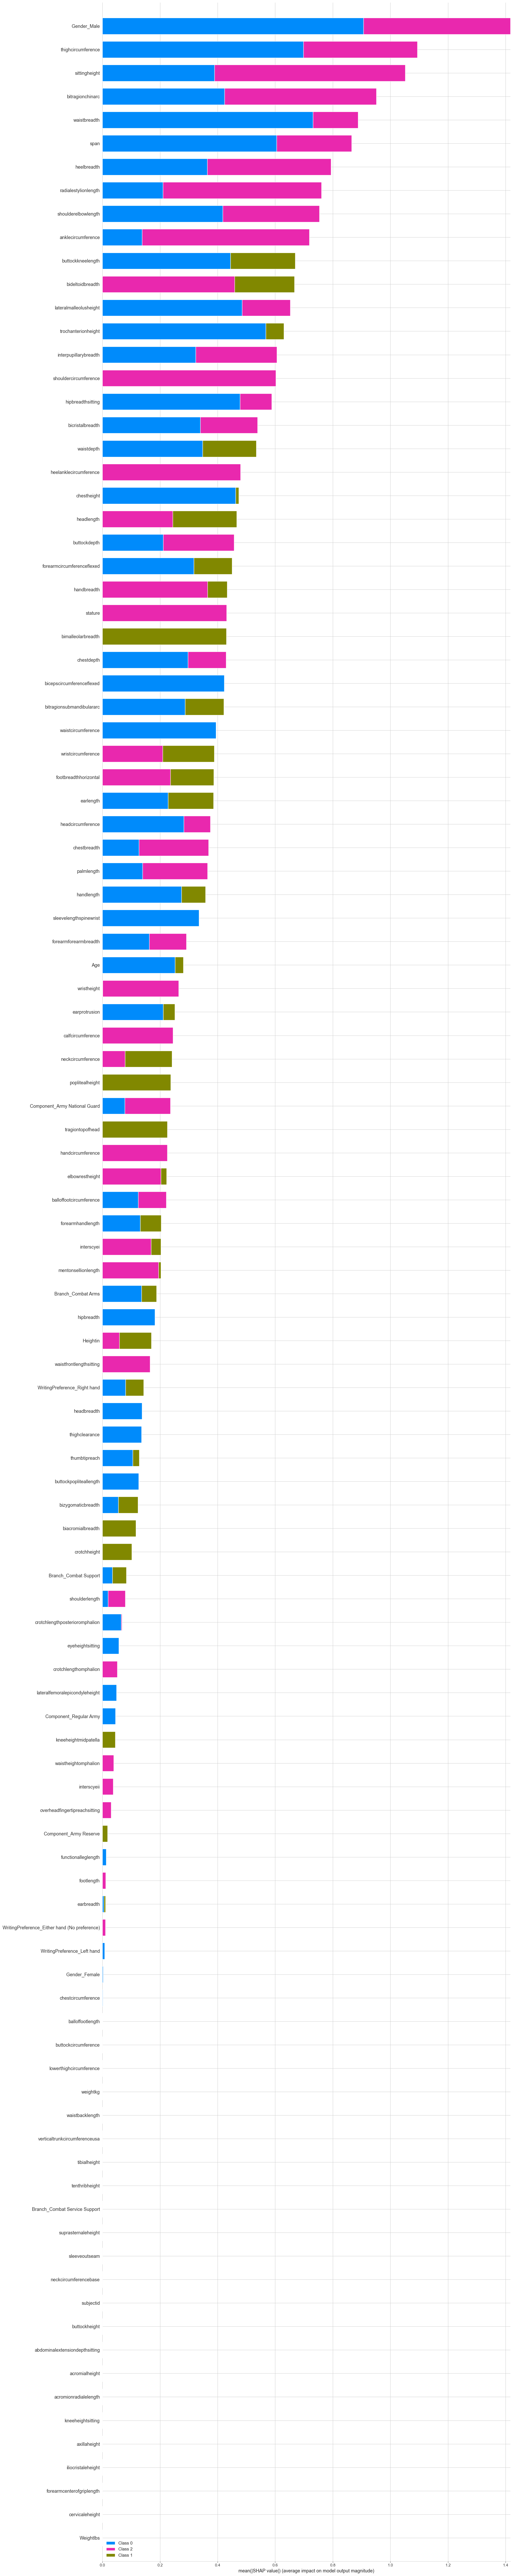

In [244]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, max_display=300, feature_names = new_features, plot_size=(20,100))

In [248]:
hispanic=['handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
          'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 
          'tragiontopofhead','bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 
          'buttockkneelength', 'earlength', 'axillaheight', "Age"]

In [249]:
X2 = X[hispanic]
X2.head()

,handlength,forearmcircumferenceflexed,headlength,bitragionsubmandibulararc,footbreadthhorizontal,bimalleolarbreadth,poplitealheight,waistdepth,WritingPreference,tragiontopofhead,bideltoidbreadth,neckcircumferencebase,biacromialbreadth,buttockheight,buttockkneelength,earlength,axillaheight,Age
0,193,299,206,291,101,71,437,240,Right hand,140,493,436,401,882,619,71,1347,41
1,195,289,201,320,98,67,417,225,Left hand,120,479,420,394,870,584,62,1293,35
2,203,357,202,330,103,75,431,255,Left hand,125,544,434,427,901,623,61,1327,42
3,194,318,199,309,106,73,393,205,Right hand,127,518,446,401,821,560,66,1239,31
4,218,324,197,310,111,80,523,214,Right hand,122,524,430,435,1080,706,56,1478,21


In [250]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['WritingPreference'], dtype='object')

In [251]:
X2.shape

(5769, 18)

In [252]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [253]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), 
                                       remainder=MinMaxScaler())

operations_shap = [("OneHotEncoder",column_trans_shap),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                            random_state=101, penalty="l1", solver='saga'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [254]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[203  24  33]
 [ 19  87  30]
 [132 197 429]]
              precision    recall  f1-score   support

       Black       0.57      0.78      0.66       260
    Hispanic       0.28      0.64      0.39       136
       White       0.87      0.57      0.69       758

    accuracy                           0.62      1154
   macro avg       0.58      0.66      0.58      1154
weighted avg       0.74      0.62      0.65      1154


Train_Set
[[ 814   90  134]
 [  60  348  135]
 [ 444  842 1748]]
              precision    recall  f1-score   support

       Black       0.62      0.78      0.69      1038
    Hispanic       0.27      0.64      0.38       543
       White       0.87      0.58      0.69      3034

    accuracy                           0.63      4615
   macro avg       0.59      0.67      0.59      4615
weighted avg       0.74      0.63      0.66      4615



In [255]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic            0.374670
train_f1_Hispanic           0.379093
test_precision_Hispanic     0.267445
train_precision_Hispanic    0.270310
test_recall_Hispanic        0.626164
train_recall_Hispanic       0.634448
dtype: float64

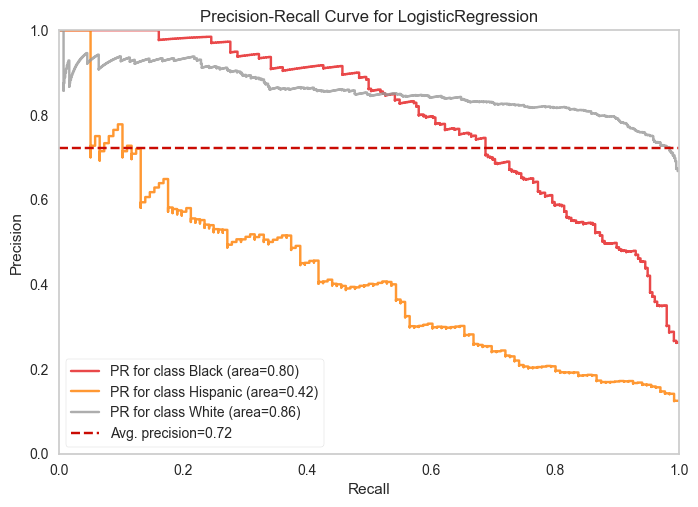

In [256]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations_shap)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

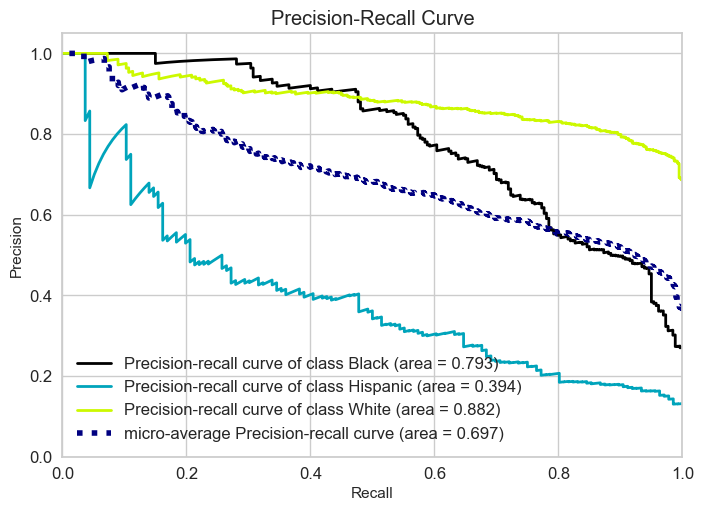

In [257]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___